In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from pygal_maps_world.maps import World

In [ ]:
df = pd.read_csv('26_Land_Cover_Accounts.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3046 entries, 0 to 3045
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              3046 non-null   object 
 1   ISO2                 2977 non-null   object 
 2   ISO3                 3046 non-null   object 
 3   Indicator            3046 non-null   object 
 4   Unit                 3046 non-null   object 
 5   Source               3046 non-null   object 
 6   CTS Code             3046 non-null   object 
 7   CTS Name             3046 non-null   object 
 8   CTS Full Descriptor  3046 non-null   object 
 9   Climate Influence    3046 non-null   object 
 10  1992                 3036 non-null   float64
 11  1993                 3040 non-null   float64
 12  1994                 3040 non-null   float64
 13  1995                 3040 non-null   float64
 14  1996                 3040 non-null   float64
 15  1997                 3040 non-null   f

In [ ]:
for row in range(244):
    rep_val = 0
    for col in range(1992,2021):
        if not pd.isna(df.loc[row][str(col)]):
            rep_val = df.loc[row][str(col)]
            break
    for col in range(1992,2021):
        if pd.isna(df.loc[row][str(col)]):
            df.at[row,str(col)] = rep_val
        else:
            break



In [ ]:
region =  set(df.loc[df['ISO2'].isna()]['Country'])

In [ ]:
region

{'Advanced Economies',
 'Advanced Economies excluding US',
 'Africa',
 'Americas',
 'Asia',
 'Emerging and Developing Countries Asia excluding China',
 'Emerging and Developing Countries Europe',
 'Emerging and Developing Economies',
 'Europe',
 'Latin America and the Caribbean',
 'Middle East and Central Asia',
 'Namibia',
 'Oceania',
 'Sub-Saharan Africa',
 'World'}

In [ ]:
country_code_dict = dict(zip(df['Country'], df['ISO2'].apply(lambda x: str(x).lower())))

In [ ]:
drop_column = ['ISO2','ISO3','Unit','Source','CTS Code','CTS Name','CTS Full Descriptor']
df.drop(drop_column, axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3046 entries, 0 to 3045
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            3046 non-null   object 
 1   Indicator          3046 non-null   object 
 2   Climate Influence  3046 non-null   object 
 3   1992               3046 non-null   float64
 4   1993               3046 non-null   float64
 5   1994               3046 non-null   float64
 6   1995               3046 non-null   float64
 7   1996               3046 non-null   float64
 8   1997               3046 non-null   float64
 9   1998               3046 non-null   float64
 10  1999               3046 non-null   float64
 11  2000               3046 non-null   float64
 12  2001               3046 non-null   float64
 13  2002               3046 non-null   float64
 14  2003               3046 non-null   float64
 15  2004               3046 non-null   float64
 16  2005               3046 

# Trend - Country influencec


In [ ]:
climate_altering = df.loc[df['Climate Influence']=='Climate altering'].loc[df['Indicator']!='Climate Altering Land Cover Index'].loc[~df['Country'].isin(region)].sum()
climate_regulating = df.loc[df['Climate Influence']=='Climate regulating'].loc[df['Indicator']!='Climate Altering Land Cover Index'].loc[~df['Country'].isin(region)].sum()
climate_neutral = df.loc[df['Climate Influence']=='Climate neutral'].loc[df['Indicator']!='Climate Altering Land Cover Index'].loc[~df['Country'].isin(region)].sum()

In [ ]:
climate_altering_trend = []
climate_regulating_trend = []
climate_neutral_trend = []
for i in range(1992, 2021):
    climate_altering_trend.append(climate_altering[str(i)])
    climate_neutral_trend.append(climate_neutral[str(i)])
    climate_regulating_trend.append(climate_regulating[str(i)])

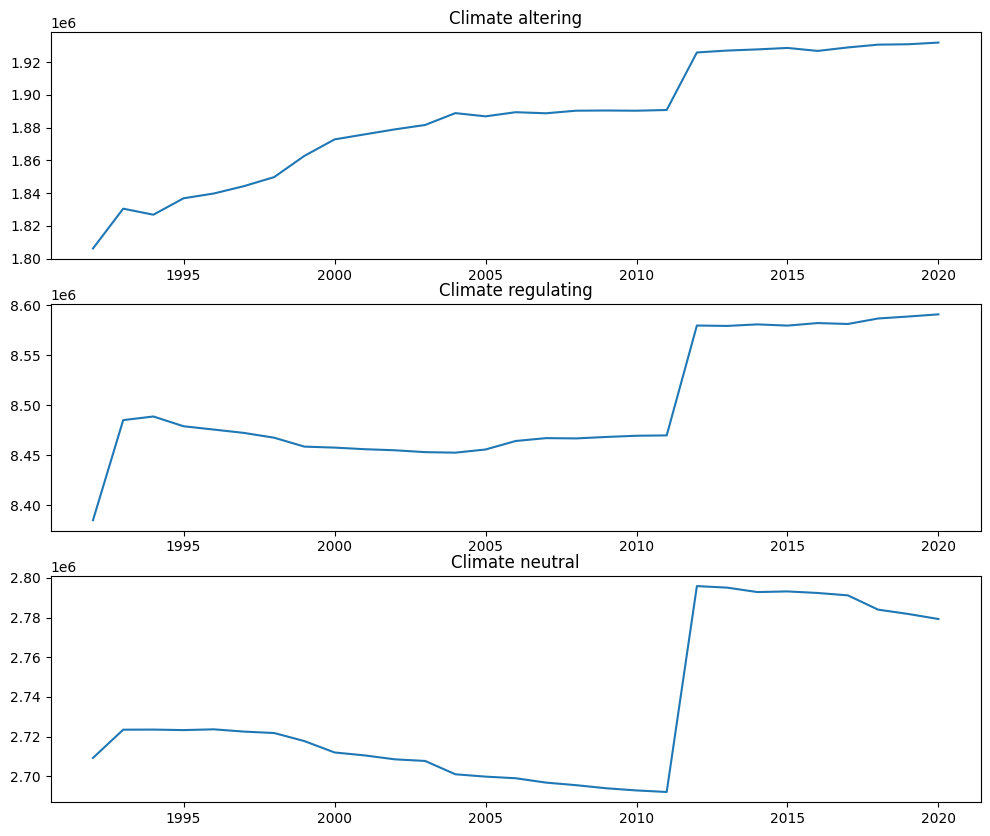

In [ ]:
fig,ax = plt.subplots(3,1,figsize=(12,10))
ax.flat[0].plot(range(1992,2021), climate_altering_trend)
ax.flat[0].set_title('Climate altering')
ax.flat[1].plot(range(1992,2021), climate_regulating_trend)
ax.flat[1].set_title('Climate regulating')
ax.flat[2].plot(range(1992,2021), climate_neutral_trend)
ax.flat[2].set_title('Climate neutral')
plt.show()


In [ ]:
climate_altering = df.loc[df['Climate Influence']=='Climate altering'].loc[df['Indicator']=='Climate Altering Land Cover Index'].loc[~df['Country'].isin(region)].sum()

In [ ]:
climate_altering_trend = []
for i in range(1992, 2021):
    climate_altering_trend.append(climate_altering[str(i)])

Text(0.5, 1.0, 'Climate altering land cover index in the world')

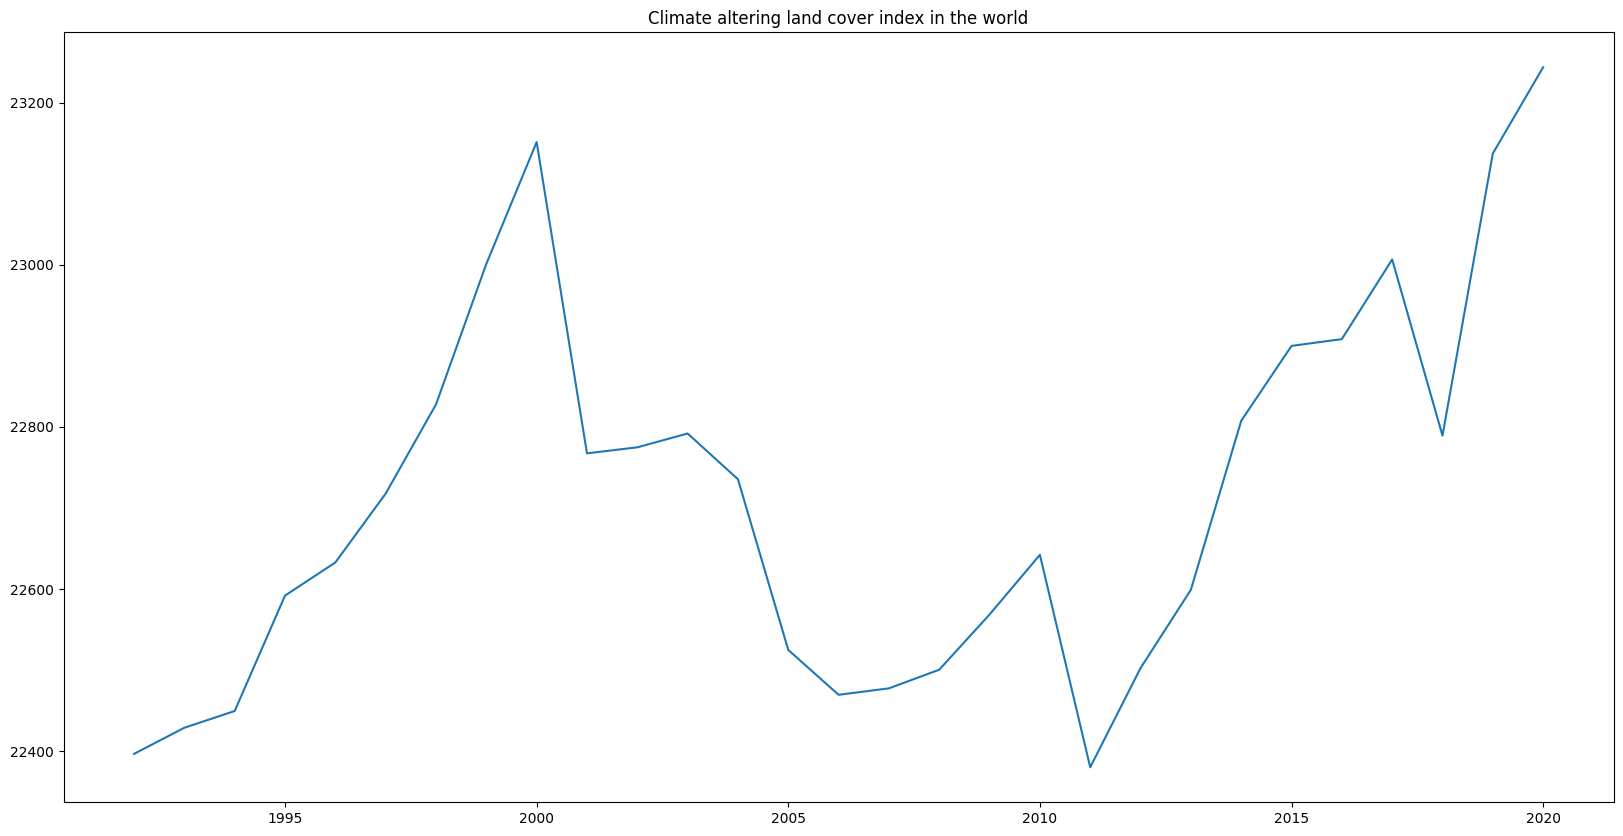

In [ ]:
fig,ax = plt.subplots(figsize=(20,10))
ax.plot(range(1992,2021), climate_altering_trend)
ax.set_title('Climate altering land cover index in the world')


# Trend - Region Influence

In [ ]:
climate_altering = df.loc[df['Climate Influence']=='Climate altering'].loc[df['Indicator']!='Climate Altering Land Cover Index'].loc[df['Country'].isin(region)].sum()
climate_regulating = df.loc[df['Climate Influence']=='Climate regulating'].loc[df['Indicator']!='Climate Altering Land Cover Index'].loc[df['Country'].isin(region)].sum()
climate_neutral = df.loc[df['Climate Influence']=='Climate neutral'].loc[df['Indicator']!='Climate Altering Land Cover Index'].loc[df['Country'].isin(region)].sum()

In [ ]:
climate_altering_trend = []
climate_regulating_trend = []
climate_neutral_trend = []
for i in range(1992, 2021):
    climate_altering_trend.append(climate_altering[str(i)])
    climate_neutral_trend.append(climate_neutral[str(i)])
    climate_regulating_trend.append(climate_regulating[str(i)])

Text(0.5, 1.0, 'Climate neutral')

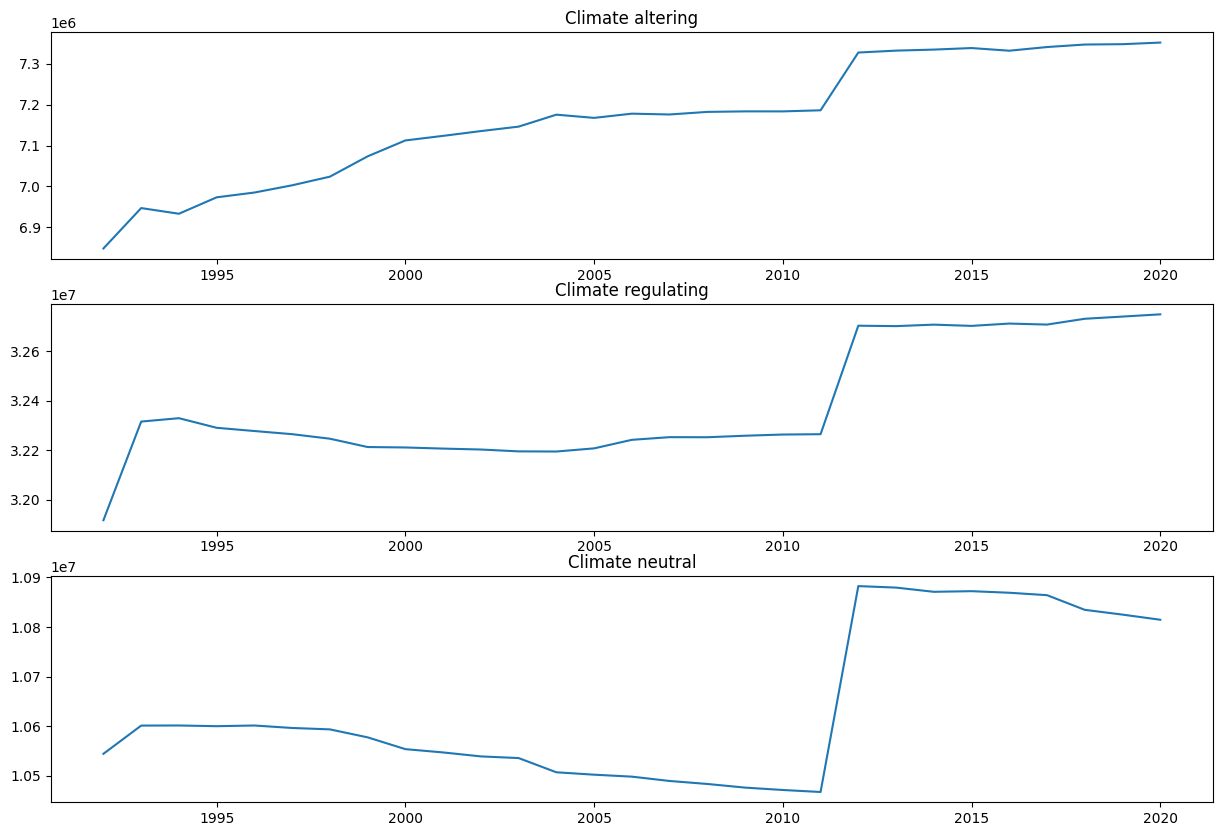

In [ ]:
fig,ax = plt.subplots(3,1,figsize=(15,10))
ax.flat[0].plot(range(1992,2021), climate_altering_trend)
ax.flat[0].set_title('Climate altering')
ax.flat[1].plot(range(1992,2021), climate_regulating_trend)
ax.flat[1].set_title('Climate regulating')
ax.flat[2].plot(range(1992,2021), climate_neutral_trend)
ax.flat[2].set_title('Climate neutral')


In [ ]:
climate_altering = df.loc[df['Climate Influence']=='Climate altering'].loc[df['Indicator']=='Climate Altering Land Cover Index'].loc[df['Country'].isin(region)].sum()

In [ ]:
climate_altering_trend = []
for i in range(1992, 2021):
    climate_altering_trend.append(climate_altering[str(i)])

Text(0.5, 1.0, 'Climate altering')

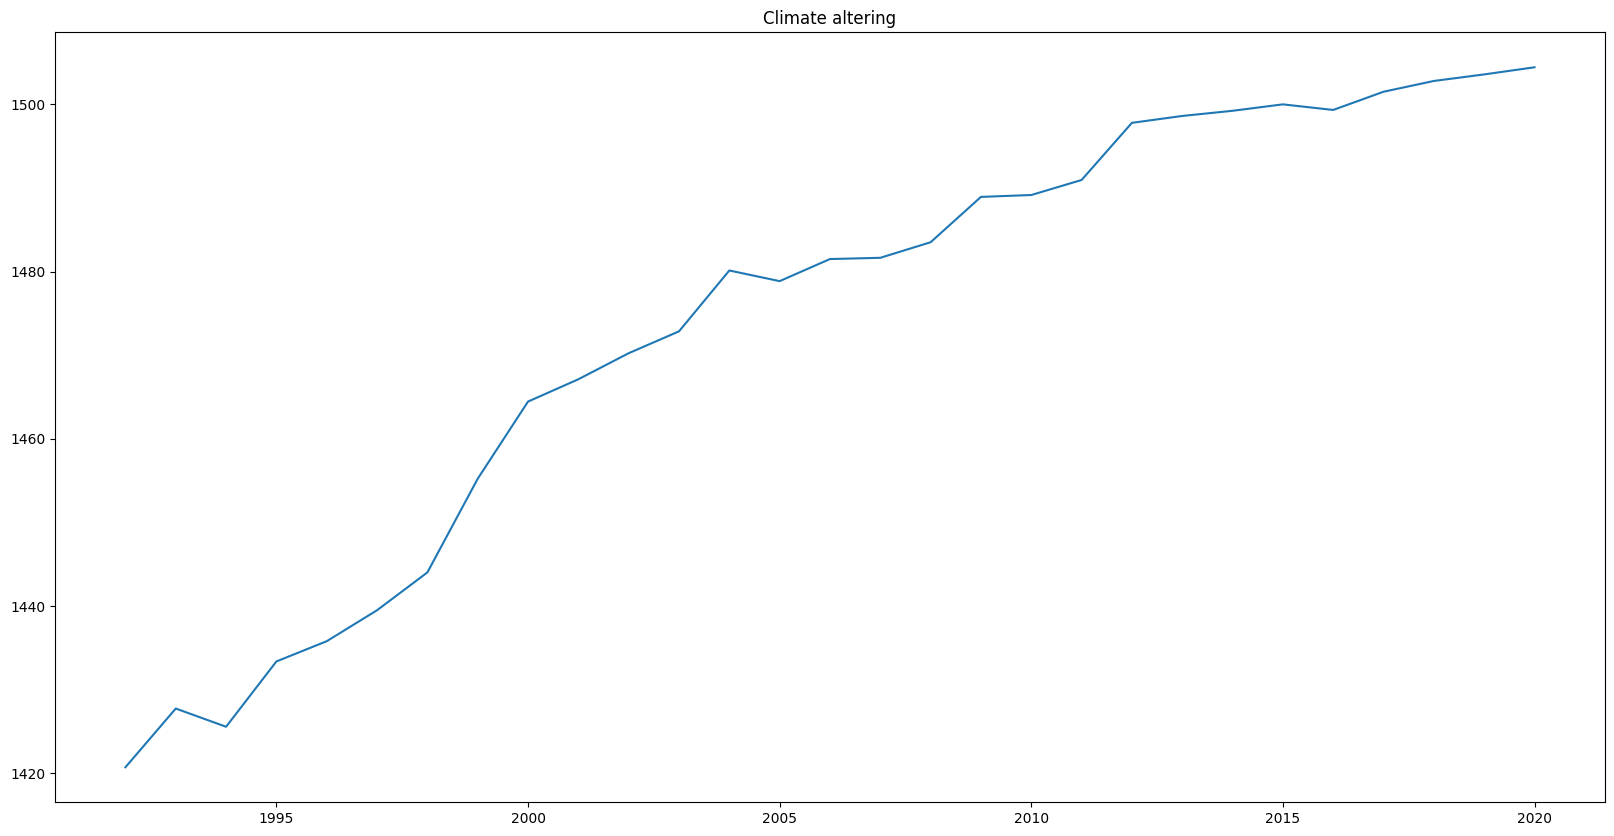

In [ ]:
fig,ax = plt.subplots(figsize=(20,10))
ax.plot(range(1992,2021), climate_altering_trend)
ax.set_title('Climate altering')


# Trend - Indicator

In [ ]:
indicator = df['Indicator'].unique()

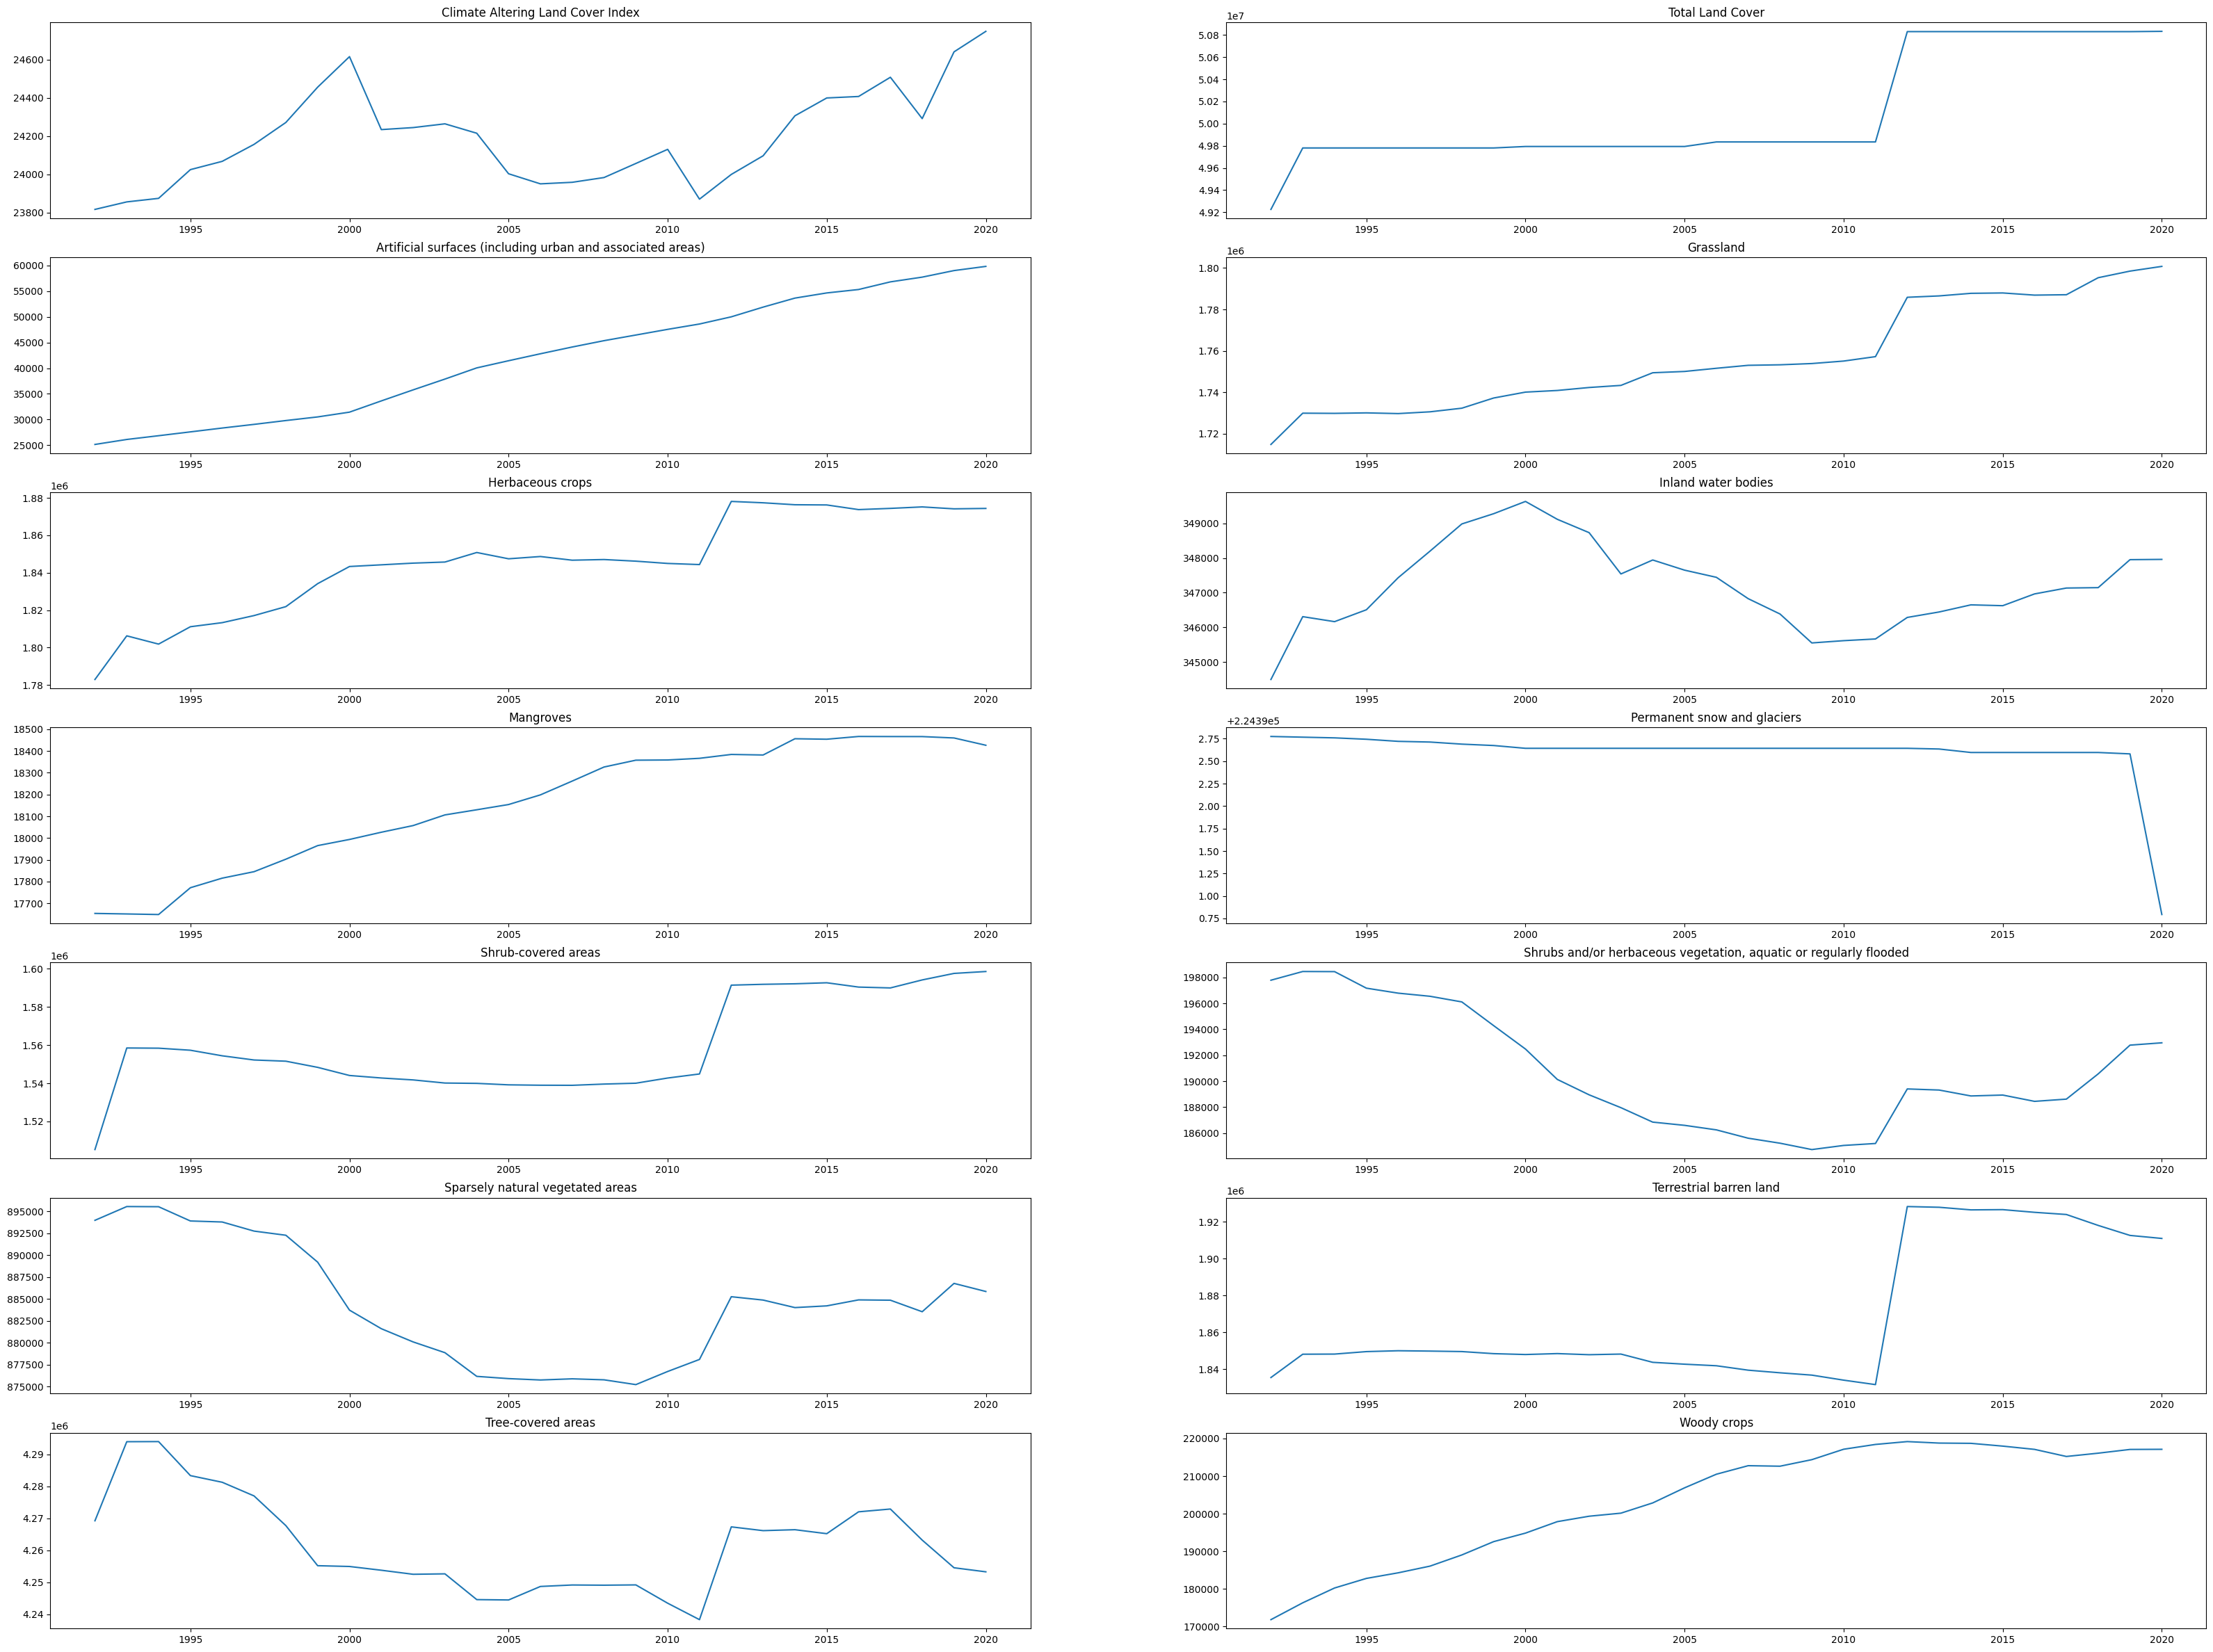

In [ ]:
group_by_indicator = df.groupby('Indicator').sum()
fig,ax = plt.subplots(7,2,figsize=(40,30))
for i in range(14):
    sum_land_cover = []
    for j in range(1992,2021):
        sum_land_cover.append(group_by_indicator.loc[indicator[i],str(j)])
    ax.flatten()[i].plot(range(1992,2021),sum_land_cover)
    ax.flatten()[i].set_title(indicator[i])
plt.show()


In [ ]:
group_by_country_influence = df.loc[~df['Country'].isin(region)].groupby(['Country','Climate Influence']).sum()
group_by_country_influence

Indicator  \
Country                      Climate Influence                                                       
Afghanistan, Islamic Rep. of Climate altering    Climate Altering Land Cover IndexArtificial su...   
                             Climate neutral     Sparsely natural vegetated areasTerrestrial ba...   
                             Climate regulating  GrasslandInland water bodiesMangrovesPermanent...   
Albania                      Climate altering    Climate Altering Land Cover IndexArtificial su...   
                             Climate neutral     Sparsely natural vegetated areasTerrestrial ba...   
...                                                                                            ...   
Zambia                       Climate neutral     Sparsely natural vegetated areasTerrestrial ba...   
                             Climate regulating  GrasslandInland water bodiesMangrovesPermanent...   
Zimbabwe                     Climate altering    Climate Altering Land Cover IndexArtificial su...   
                             Climate neutral     Sparsely natural vegetated areasTerrestrial ba...   
                             Climate regulating  GrasslandInland water bodiesMangrovesPermanent...   

                                                         1992          1993  \
Country                      Climate Influence                                
Afghanistan, Islamic Rep. of Climate altering     5887.261612   5893.668219   
                             Climate neutral     29238.256200  29238.225200   
                             Climate regulating  29321.697600  29315.483600   
Albania                      Climate altering     1093.623467   1093.470119   
                             Climate neutral        85.022300     84.813000   
...                                                       ...           ...   
Zambia                       Climate neutral         3.813200      3.797700   
                             Climate regulating  68129.653300  68131.911800   
Zimbabwe                     Climate altering    12650.086081  12656.426339   
                             Climate neutral       110.366100    110.342900   
                             Climate regulating  26608.006400  26601.699900   

                                                         1994          1995  \
Country                      Climate Influence                                
Afghanistan, Islamic Rep. of Climate altering     5892.323069   5904.531862   
                             Climate neutral     29238.225200  29316.428700   
                             Climate regulating  29316.821600  29226.524100   
Albania                      Climate altering     1093.615471   1097.685109   
                             Climate neutral        84.642500     84.394400   
...                                                       ...           ...   
Zambia                       Climate neutral         3.797700      3.821000   
                             Climate regulating  68132.581700  68023.998000   
Zimbabwe                     Climate altering    12666.443189  12678.443793   
                             Climate neutral       110.327400    110.087200   
                             Climate regulating  26591.797500  26580.126600   

                                                         1996          1997  \
Country                      Climate Influence                                
Afghanistan, Islamic Rep. of Climate altering     5915.117112   5921.860783   
                             Climate neutral     29329.148600  29348.690300   
                             Climate regulating  29203.407500  29177.276600   
Albania                      Climate altering     1097.182015   1101.531291   
                             Climate neutral        84.154200     84.270500   
...                                                       ...           ...   
Zambia                       Climate neutral         3.836500      3.92170

# Climate altering countries

In [ ]:
climate_altering = df.loc[df['Climate Influence'] == 'Climate altering'].loc[~df['Country'].isin(region)].groupby('Country').sum()
climate_altering.sort_values('2020',ascending=False).head(10).index
# climate_altering_df = pd.DataFrame(climate_altering)
# climate_altering_df['1992']

Index(['China, P.R.: Mainland', 'India', 'United States', 'Russian Federation',
       'Brazil', 'Australia', 'Argentina', 'Canada', 'Kazakhstan, Rep. of',
       'Ukraine'],
      dtype='object', name='Country')

In [ ]:
climate_altering = df.loc[df['Climate Influence'] == 'Climate altering'].loc[~df['Country'].isin(region)].loc[df['Indicator']!='Climate Altering Land Cover Index'].groupby('Country').sum()
climate_altering_per_year = []
for i in range(1992,2021):
    climate_altering_per_year.append(list(climate_altering.sort_values(str(i),ascending=False).head(20).index))
climate_altering_per_year_df = pd.DataFrame(climate_altering_per_year,index=range(1992,2021)).T
climate_altering_per_year_df

,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,"China, P.R.: Mainland","China, P.R.: Mainland","China, P.R.: Mainland","China, P.R.: Mainland","China, P.R.: Mainland","China, P.R.: Mainland","China, P.R.: Mainland","China, P.R.: Mainland","China, P.R.: Mainland","China, P.R.: Mainland",...,"China, P.R.: Mainland","China, P.R.: Mainland","China, P.R.: Mainland","China, P.R.: Mainland","China, P.R.: Mainland","China, P.R.: Mainland","China, P.R.: Mainland","China, P.R.: Mainland","China, P.R.: Mainland","China, P.R.: Mainland"
1,India,India,India,India,India,India,India,India,India,India,...,India,India,India,India,India,India,India,India,India,India
2,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,...,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States
3,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,...,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation
4,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,...,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil
5,Canada,Canada,Canada,Canada,Canada,Canada,Canada,Canada,Canada,Australia,...,Argentina,Argentina,Argentina,Argentina,Australia,Australia,Australia,Australia,Australia,Australia
6,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Canada,...,Australia,Australia,Australia,Australia,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina
7,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,...,Canada,Canada,Canada,Canada,Canada,Canada,Canada,Canada,Canada,Canada
8,Ukraine,Ukraine,Ukraine,Ukraine,Ukraine,Ukraine,Ukraine,Ukraine,"Kazakhstan, Rep. of","Kazakhstan, Rep. of",...,"Kazakhstan, Rep. of","Kazakhstan, Rep. of","Kazakhstan, Rep. of","Kazakhstan, Rep. of","Kazakhstan, Rep. of","Kazakhstan, Rep. of","Kazakhstan, Rep. of","Kazakhstan, Rep. of","Kazakhstan, Rep. of","Kazakhstan, Rep. of"
9,Nigeria,"Kazakhstan, Rep. of","Kazakhstan, Rep. of",Nigeria,Nigeria,"Kazakhstan, Rep. of","Kazakhstan, Rep. of","Kazakhstan, Rep. of",Ukraine,Ukraine,...,Ukraine,Ukraine,Ukraine,Ukraine,Ukraine,Ukraine,Ukraine,Ukraine,Ukraine,Ukraine


In [ ]:
top_countries = set()
top_countries_area = dict()
for year in climate_altering_per_year_df.columns:
    countries = climate_altering_per_year_df[year].unique()
    for country in countries:
        if country in top_countries:
            continue
        else:
            top_countries.add(country)
            top_countries_area[country] = list(climate_altering.loc[climate_altering.index == country]['2020'])[0]

In [ ]:
len(top_countries)

22

In [ ]:
top_countries_area = {k: v for k,v in sorted(top_countries_area.items(), key=lambda x: x[1], reverse=True)}

In [ ]:
world_map_code = pd.read_csv('world_map_code.csv')

In [ ]:
world_map_code


,code,Country
0,ad,(Andorra))
1,ae,(United Arab Emirates)
2,af,(Afghanistan)
3,al,(Albania)
4,am,(Armenia)
...,...,...
179,ye,(Yemen)
180,yt,(Mayotte)
181,za,(South Africa)
182,zm,(Zambia)


In [ ]:
for i in top_countries_area.items():
    print(i)

('China, P.R.: Mainland', 201533.6218)
('India', 177174.877)
('United States', 163321.2216)
('Russian Federation', 160743.3971)
('Brazil', 147494.27949999998)
('Australia', 53913.947499999995)
('Argentina', 53578.6701)
('Canada', 53502.846000000005)
('Kazakhstan, Rep. of', 48501.5858)
('Ukraine', 43295.3816)
('Nigeria', 41724.8498)
('Sudan', 31632.922)
('Mexico', 25626.7616)
('France', 25355.5017)
('Pakistan', 24446.686100000003)
('Iran, Islamic Rep. of', 24113.910300000003)
('Thailand', 23709.193199999998)
('Indonesia', 23142.1257)
('Mali', 21600.5413)
('Congo, Dem. Rep. of the', 21023.7321)
('Tanzania, United Rep. of', 20640.181500000002)
('Ethiopia, The Federal Dem. Rep. of', 17810.5746)


In [ ]:
map_code = []
for country in top_countries_area.items():
    try:
        map_code.append([list(world_map_code.loc[world_map_code['code']==country_code_dict[country[0]]]['code']),country[0],country[1]])
    except:
        print(country)

In [ ]:
world_map = World()
world_map.title = 'Top 20 Climate Altering Countries'
world_map_dict = dict()
for code,country,count in map_code[:20]:
    world_map_dict[code[0]] = count
world_map.add('Top 20 Climate Altering Countries',world_map_dict)
world_map.render_to_file('Top 20 Climate Altering Countries.svg')

In [ ]:
climate_altering_indicator = ['Artificial surfaces (including urban and associated areas)','Herbaceous crops']

In [ ]:
art_surefaces = []
herbaceous_crops = []
for i in top_countries_area.items():
    art_surefaces.append(list(df.loc[df['Country']==i[0]].loc[df['Indicator']==climate_altering_indicator[0]]['2020'])[0])
    herbaceous_crops.append(list(df.loc[df['Country']==i[0]].loc[df['Indicator']==climate_altering_indicator[1]]['2020'])[0])

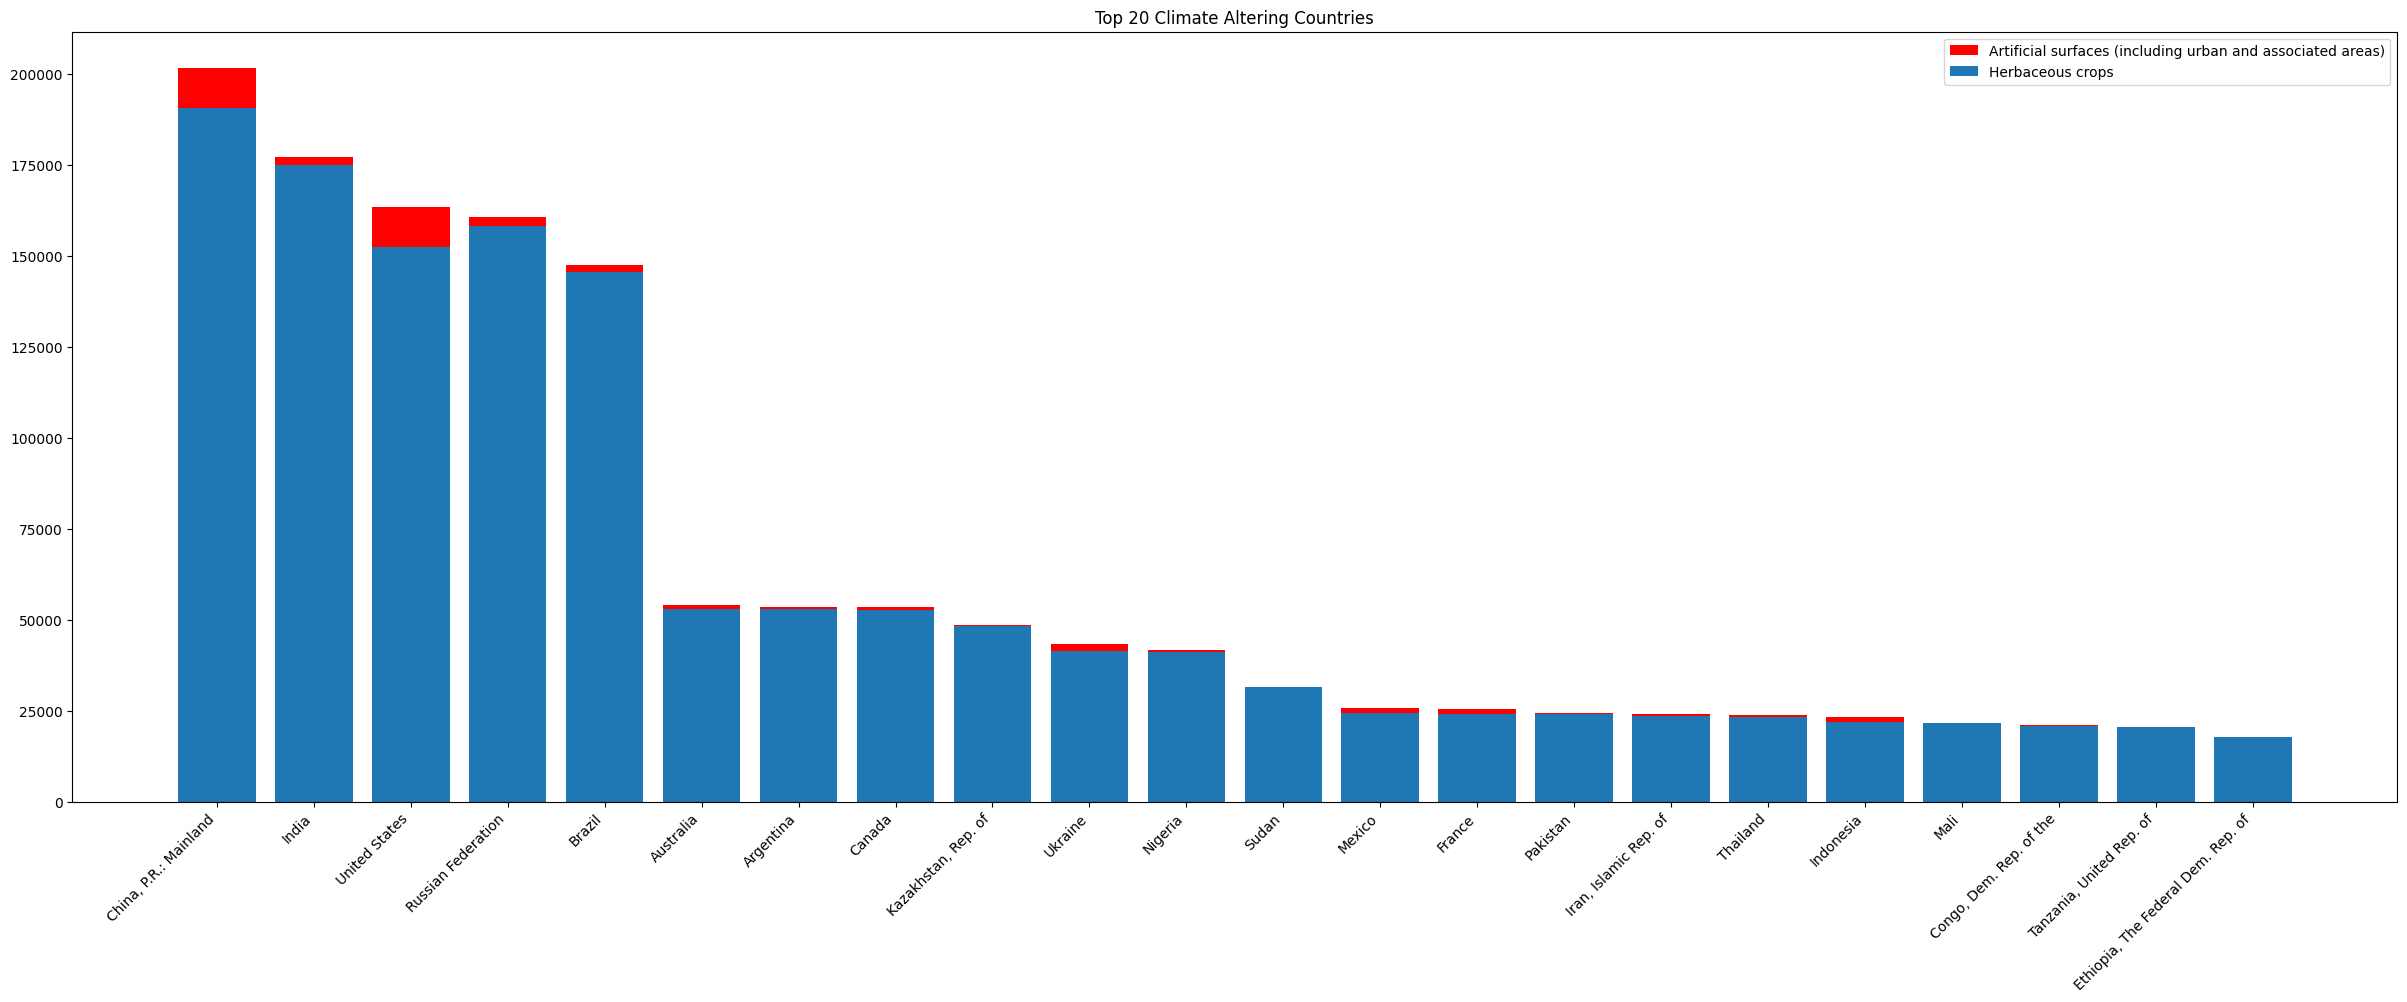

In [ ]:
plt.figure(figsize=(30,10))
plt.bar(top_countries_area.keys(),art_surefaces,bottom=herbaceous_crops,color='r')
plt.bar(top_countries_area.keys(),herbaceous_crops)
plt.title('Top 20 Climate Altering Countries')
plt.legend([climate_altering_indicator[0],climate_altering_indicator[1]])
plt.xticks(rotation=45, ha='right')
plt.show()

# Climate Regulating Countries

In [ ]:
climate_regulating = df.loc[df['Climate Influence'] == 'Climate regulating'].loc[~df['Country'].isin(region)].groupby('Country').sum()
climate_regulating.sort_values('2020',ascending=False).head(10).index

Index(['Russian Federation', 'Canada', 'United States', 'Brazil',
       'China, P.R.: Mainland', 'Australia', 'Congo, Dem. Rep. of the',
       'Greenland', 'Mexico', 'Argentina'],
      dtype='object', name='Country')

In [ ]:
climate_regulating = df.loc[df['Climate Influence'] == 'Climate regulating'].loc[~df['Country'].isin(region)].groupby('Country').sum()
climate_regulating_per_year = []
for i in range(1992,2021):
    climate_regulating_per_year.append(list(climate_regulating.sort_values(str(i),ascending=False).head(20).index))
climate_regulating_per_year_df = pd.DataFrame(climate_regulating_per_year,index=range(1992,2021)).T
climate_regulating_per_year_df

,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,...,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation
1,Canada,Canada,Canada,Canada,Canada,Canada,Canada,Canada,Canada,Canada,...,Canada,Canada,Canada,Canada,Canada,Canada,Canada,Canada,Canada,Canada
2,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,...,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States
3,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,...,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil
4,"China, P.R.: Mainland","China, P.R.: Mainland","China, P.R.: Mainland","China, P.R.: Mainland","China, P.R.: Mainland","China, P.R.: Mainland","China, P.R.: Mainland","China, P.R.: Mainland","China, P.R.: Mainland","China, P.R.: Mainland",...,"China, P.R.: Mainland","China, P.R.: Mainland","China, P.R.: Mainland","China, P.R.: Mainland","China, P.R.: Mainland","China, P.R.: Mainland","China, P.R.: Mainland","China, P.R.: Mainland","China, P.R.: Mainland","China, P.R.: Mainland"
5,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,...,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia
6,"Congo, Dem. Rep. of the","Congo, Dem. Rep. of the","Congo, Dem. Rep. of the","Congo, Dem. Rep. of the","Congo, Dem. Rep. of the","Congo, Dem. Rep. of the","Congo, Dem. Rep. of the","Congo, Dem. Rep. of the","Congo, Dem. Rep. of the","Congo, Dem. Rep. of the",...,"Congo, Dem. Rep. of the","Congo, Dem. Rep. of the","Congo, Dem. Rep. of the","Congo, Dem. Rep. of the","Congo, Dem. Rep. of the","Congo, Dem. Rep. of the","Congo, Dem. Rep. of the","Congo, Dem. Rep. of the","Congo, Dem. Rep. of the","Congo, Dem. Rep. of the"
7,Greenland,Greenland,Greenland,Greenland,Greenland,Greenland,Greenland,Greenland,Greenland,Greenland,...,Greenland,Greenland,Greenland,Greenland,Greenland,Greenland,Greenland,Greenland,Greenland,Greenland
8,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Mexico,Mexico,Mexico,...,Mexico,Mexico,Mexico,Mexico,Mexico,Mexico,Mexico,Mexico,Mexico,Mexico
9,Mexico,Mexico,Mexico,Mexico,Mexico,Mexico,Mexico,Argentina,Argentina,Argentina,...,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia,Argentina,Argentina,Argentina,Argentina


In [ ]:
top_countries = set()
top_countries_area = dict()
for year in climate_regulating_per_year_df.columns:
    countries = climate_regulating_per_year_df[year].unique()
    for country in countries:
        if country in top_countries:
            continue
        else:
            top_countries.add(country)
            top_countries_area[country] = list(climate_regulating.loc[climate_regulating.index == country]['2020'])[0]

In [ ]:
len(top_countries)

21

In [ ]:
top_countries_area = {k: v for k,v in sorted(top_countries_area.items(), key=lambda x: x[1], reverse=True)}

In [ ]:
for i in top_countries_area.items():
    print(i)

('Russian Federation', 1385317.7945)
('Canada', 783862.8118)
('United States', 731527.8971)
('Brazil', 705786.8512)
('China, P.R.: Mainland', 545522.1018000001)
('Australia', 412480.03400000004)
('Congo, Dem. Rep. of the', 213398.5847)
('Greenland', 188158.64299999998)
('Mexico', 167487.4492)
('Argentina', 165344.79510000002)
('Indonesia', 164667.264)
('Kazakhstan, Rep. of', 140119.3464)
('India', 118539.9703)
('Angola', 116475.7906)
('Peru', 111718.2917)
('Colombia', 107663.64640000001)
('South Africa', 98792.2079)
('Ethiopia, The Federal Dem. Rep. of', 88372.2121)
('Bolivia', 87628.9938)
('Venezuela, Rep. Bolivariana de', 82888.4687)
('Tanzania, United Rep. of', 73603.295)


In [ ]:
map_code = []
for country in top_countries_area.items():
    try:
        map_code.append([list(world_map_code.loc[world_map_code['code']==country_code_dict[country[0]]]['code']),country[0],country[1]])
    except:
        print(country)

In [ ]:
world_map = World()
world_map.title = 'Top 20 Climate Regulating Countries'
world_map_dict = dict()
for code,country,count in map_code[:20]:
    world_map_dict[code[0]] = count
world_map.add('Top 20 Climate Regulating Countries',world_map_dict)
world_map.render_to_file('Top 20 Climate Regulating Countries.svg')

In [ ]:
climate_regulating_indicator = ['Grassland', 'Inland water bodies',
       'Mangroves', 'Permanent snow and glaciers', 'Shrub-covered areas',
       'Shrubs and/or herbaceous vegetation, aquatic or regularly flooded',
       'Tree-covered areas', 'Woody crops']

In [ ]:
grassland = []
inland_water_bodies = []
mangroves = []
permanent_snow_glaciers = []
shurb_covered_areas = []
shrub_herbaceous = []
tree_covered = []
woody_crops = []
for i in top_countries_area.items():
    grassland.append(list(df.loc[df['Country']==i[0]].loc[df['Indicator']==climate_regulating_indicator[0]]['2020'])[0])
    inland_water_bodies.append(list(df.loc[df['Country']==i[0]].loc[df['Indicator']==climate_regulating_indicator[1]]['2020'])[0])
    mangroves.append(list(df.loc[df['Country']==i[0]].loc[df['Indicator']==climate_regulating_indicator[2]]['2020'])[0])
    permanent_snow_glaciers.append(list(df.loc[df['Country']==i[0]].loc[df['Indicator']==climate_regulating_indicator[3]]['2020'])[0])
    shurb_covered_areas.append(list(df.loc[df['Country']==i[0]].loc[df['Indicator']==climate_regulating_indicator[4]]['2020'])[0])
    shrub_herbaceous.append(list(df.loc[df['Country']==i[0]].loc[df['Indicator']==climate_regulating_indicator[5]]['2020'])[0])
    tree_covered.append(list(df.loc[df['Country']==i[0]].loc[df['Indicator']==climate_regulating_indicator[6]]['2020'])[0])
    woody_crops.append(list(df.loc[df['Country']==i[0]].loc[df['Indicator']==climate_regulating_indicator[7]]['2020'])[0])

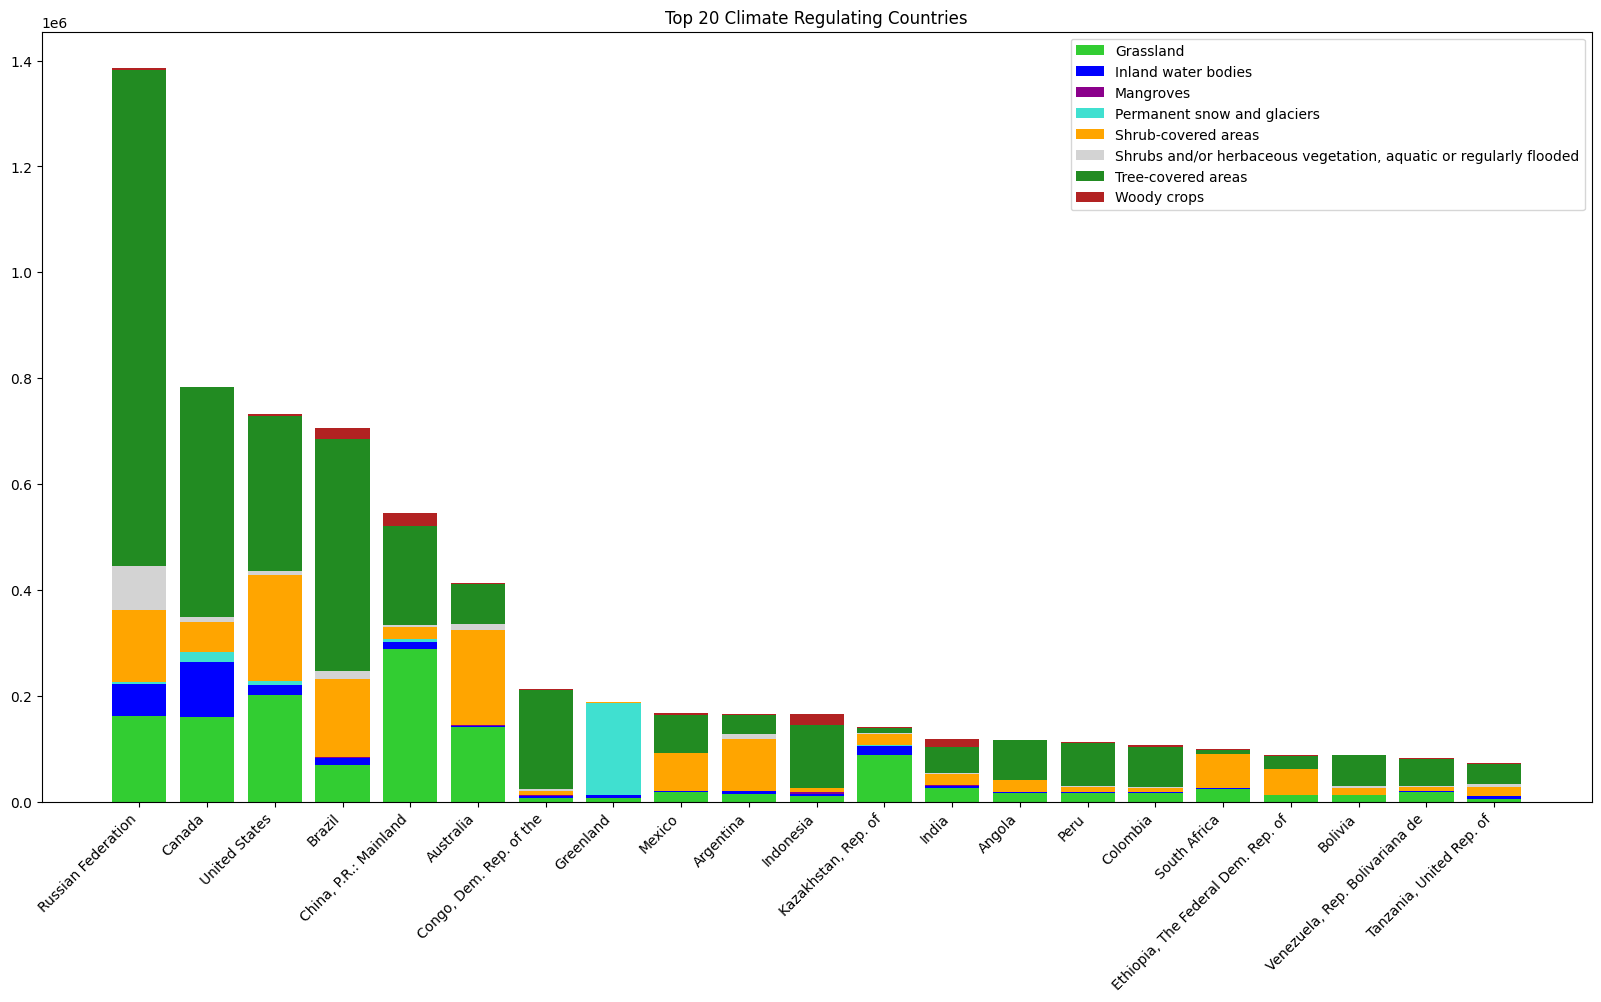

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(top_countries_area.keys(),grassland,color = 'limegreen')
plt.bar(top_countries_area.keys(),inland_water_bodies,bottom=grassland,color = 'b')
plt.bar(top_countries_area.keys(),mangroves,bottom=np.array(grassland)+np.array(inland_water_bodies),color = 'darkmagenta')
plt.bar(top_countries_area.keys(),permanent_snow_glaciers,bottom=np.array(grassland)+np.array(inland_water_bodies)+np.array(mangroves),color='turquoise')
plt.bar(top_countries_area.keys(),shurb_covered_areas,bottom=np.array(grassland)+np.array(inland_water_bodies)+np.array(mangroves)+np.array(permanent_snow_glaciers),color ='orange')
plt.bar(top_countries_area.keys(),shrub_herbaceous,bottom=np.array(grassland)+np.array(inland_water_bodies)+np.array(mangroves)+np.array(permanent_snow_glaciers)+np.array(shurb_covered_areas),color = 'lightgrey')
plt.bar(top_countries_area.keys(),tree_covered,bottom=np.array(grassland)+np.array(inland_water_bodies)+np.array(mangroves)+np.array(permanent_snow_glaciers)+np.array(shurb_covered_areas)+np.array(shrub_herbaceous),color='forestgreen')
plt.bar(top_countries_area.keys(),woody_crops,bottom=np.array(grassland)+np.array(inland_water_bodies)+np.array(mangroves)+np.array(permanent_snow_glaciers)+np.array(shurb_covered_areas)+np.array(shrub_herbaceous)+np.array(tree_covered),color='firebrick')
plt.xticks(rotation=45, ha='right')
plt.legend(climate_regulating_indicator)
plt.title('Top 20 Climate Regulating Countries')
plt.show()

# Climate neutral countries

In [ ]:
climate_neutral = df.loc[df['Climate Influence'] == 'Climate neutral'].loc[~df['Country'].isin(region)].groupby('Country').sum()
climate_neutral.sort_values('2020',ascending=False).head(10).index

Index(['Australia', 'Algeria', 'Saudi Arabia', 'China, P.R.: Mainland',
       'Libya', 'Russian Federation', 'Canada', 'Iran, Islamic Rep. of',
       'Sudan', 'Mongolia'],
      dtype='object', name='Country')

In [ ]:
climate_neutral = df.loc[df['Climate Influence'] == 'Climate neutral'].loc[~df['Country'].isin(region)].groupby('Country').sum()
climate_neutral_per_year = []
for i in range(1992,2021):
    climate_neutral_per_year.append(list(climate_neutral.sort_values(str(i),ascending=False).head(20).index))
climate_neutral_per_year_df = pd.DataFrame(climate_neutral_per_year,index=range(1992,2021)).T
climate_neutral_per_year_df

,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,...,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia
1,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,...,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria
2,"China, P.R.: Mainland","China, P.R.: Mainland","China, P.R.: Mainland","China, P.R.: Mainland","China, P.R.: Mainland","China, P.R.: Mainland","China, P.R.: Mainland","China, P.R.: Mainland","China, P.R.: Mainland","China, P.R.: Mainland",...,Saudi Arabia,Saudi Arabia,Saudi Arabia,Saudi Arabia,Saudi Arabia,Saudi Arabia,Saudi Arabia,Saudi Arabia,Saudi Arabia,Saudi Arabia
3,Saudi Arabia,Saudi Arabia,Saudi Arabia,Saudi Arabia,Saudi Arabia,Saudi Arabia,Saudi Arabia,Saudi Arabia,Saudi Arabia,Saudi Arabia,...,"China, P.R.: Mainland","China, P.R.: Mainland","China, P.R.: Mainland","China, P.R.: Mainland","China, P.R.: Mainland","China, P.R.: Mainland","China, P.R.: Mainland","China, P.R.: Mainland","China, P.R.: Mainland","China, P.R.: Mainland"
4,Libya,Libya,Libya,Libya,Libya,Libya,Libya,Libya,Libya,Libya,...,Libya,Libya,Libya,Libya,Libya,Libya,Libya,Libya,Libya,Libya
5,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,...,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation
6,Canada,Canada,Canada,Canada,Canada,Canada,Canada,Canada,Canada,Canada,...,Canada,Canada,Canada,Canada,Canada,Canada,Canada,Canada,Canada,Canada
7,"Iran, Islamic Rep. of","Iran, Islamic Rep. of","Iran, Islamic Rep. of","Iran, Islamic Rep. of","Iran, Islamic Rep. of","Iran, Islamic Rep. of","Iran, Islamic Rep. of","Iran, Islamic Rep. of","Iran, Islamic Rep. of","Iran, Islamic Rep. of",...,"Iran, Islamic Rep. of","Iran, Islamic Rep. of","Iran, Islamic Rep. of","Iran, Islamic Rep. of","Iran, Islamic Rep. of","Iran, Islamic Rep. of","Iran, Islamic Rep. of","Iran, Islamic Rep. of","Iran, Islamic Rep. of","Iran, Islamic Rep. of"
8,"Kazakhstan, Rep. of","Kazakhstan, Rep. of","Kazakhstan, Rep. of","Kazakhstan, Rep. of","Kazakhstan, Rep. of","Kazakhstan, Rep. of",Mongolia,Mongolia,Mongolia,Mongolia,...,Mongolia,Sudan,Sudan,Sudan,Sudan,Sudan,Sudan,Sudan,Sudan,Sudan
9,Mongolia,Mongolia,Mongolia,Mongolia,Mongolia,Mongolia,"Kazakhstan, Rep. of","Kazakhstan, Rep. of","Kazakhstan, Rep. of","Kazakhstan, Rep. of",...,"Kazakhstan, Rep. of",Mongolia,Mongolia,Mongolia,Mongolia,Mongolia,Mongolia,Mongolia,Mongolia,Mongolia


In [ ]:
top_countries = set()
top_countries_area = dict()
for year in climate_neutral_per_year_df.columns:
    countries = climate_neutral_per_year_df[year].unique()
    for country in countries:
        if country in top_countries:
            continue
        else:
            top_countries.add(country)
            top_countries_area[country] = list(climate_neutral.loc[climate_neutral.index == country]['2020'])[0]

In [ ]:
len(top_countries)

21

In [ ]:
top_countries_area = {k: v for k,v in sorted(top_countries_area.items(), key=lambda x: x[1], reverse=True)}

In [ ]:
for i in top_countries_area.items():
    print(i)

('Australia', 305563.5)
('Algeria', 216944.0374)
('Saudi Arabia', 189580.4989)
('China, P.R.: Mainland', 189380.4206)
('Libya', 159589.41650000002)
('Russian Federation', 148190.6816)
('Canada', 145724.8034)
('Iran, Islamic Rep. of', 117529.9496)
('Sudan', 104122.5202)
('Mongolia', 101761.1225)
('Kazakhstan, Rep. of', 95238.27979999999)
('Niger', 93507.70550000001)
('Egypt, Arab Rep. of', 91525.1652)
('Mauritania, Islamic Rep. of', 90047.5771)
('Mali', 74459.09740000001)
('Chad', 71898.8152)
('Argentina', 59711.8541)
('Yemen, Rep. of', 41205.5797)
('United States', 37872.2341)
('Turkmenistan', 33909.8248)
('Iraq', 32950.780300000006)


In [ ]:
map_code = []
for country in top_countries_area.items():
    try:
        map_code.append([list(world_map_code.loc[world_map_code['code']==country_code_dict[country[0]]]['code']),country[0],country[1]])
    except:
        print(country)

In [ ]:
world_map = World()
world_map.title = 'Top 20 Climate Neutral Countries'
world_map_dict = dict()
for code,country,count in map_code[:20]:
    world_map_dict[code[0]] = count
world_map.add('Top 20 Climate Neutral Countries',world_map_dict)
world_map.render_to_file('Top 20 Climate Neutral Countries.svg')

In [ ]:
df[df['Climate Influence']=='Climate neutral']['Indicator'].unique()

array(['Total Land Cover', 'Sparsely natural vegetated areas',
       'Terrestrial barren land'], dtype=object)

In [ ]:
climate_neutral_indicator = ['Sparsely natural vegetated areas','Terrestrial barren land']

In [ ]:
sparse_vegetated = []
terrestrial_barren = []
for i in top_countries_area.items():
    sparse_vegetated.append(list(df.loc[df['Country']==i[0]].loc[df['Indicator']==climate_neutral_indicator[0]]['2020'])[0])
    terrestrial_barren.append(list(df.loc[df['Country']==i[0]].loc[df['Indicator']==climate_neutral_indicator[1]]['2020'])[0])

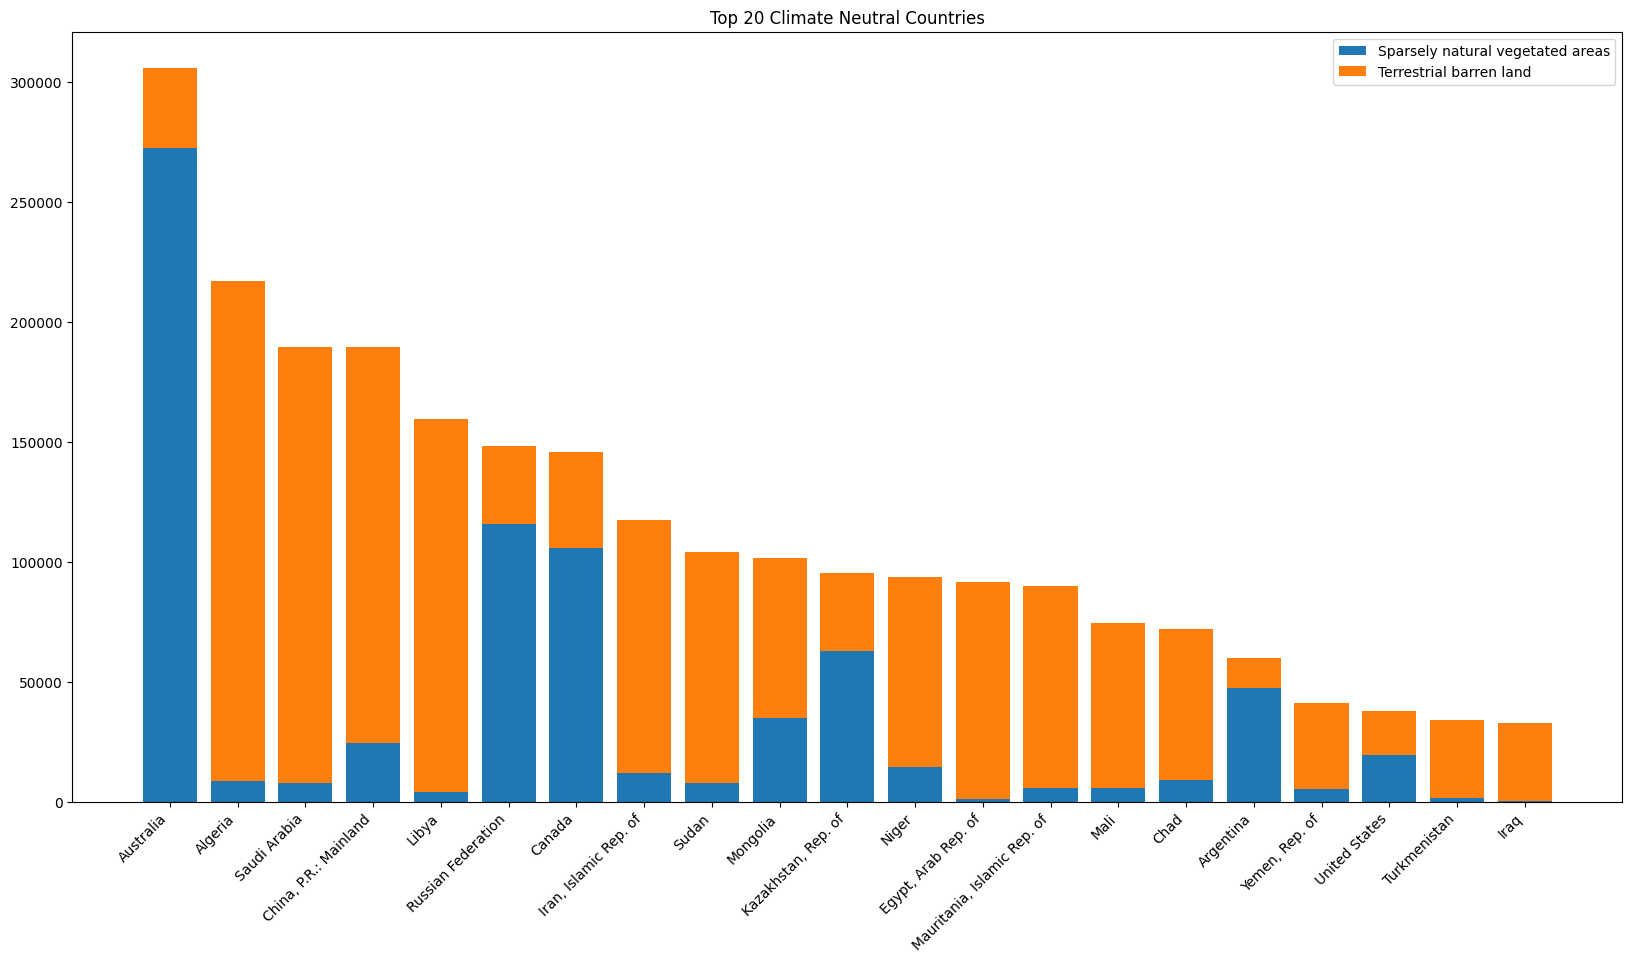

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(top_countries_area.keys(),sparse_vegetated)
plt.bar(top_countries_area.keys(),terrestrial_barren,bottom=sparse_vegetated)
plt.xticks(rotation=45, ha='right')
plt.legend(climate_neutral_indicator)
plt.title('Top 20 Climate Neutral Countries')
plt.show()

# Climate altering regions

In [ ]:
climate_altering = df.loc[df['Climate Influence'] == 'Climate altering'].loc[df['Country'].isin(region)].groupby('Country').sum()
climate_altering

,Indicator,Climate Influence,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country,,,,,,,,,,,,,,,,,,,,,
Advanced Economies,Climate Altering Land Cover IndexTotal Land Cover,Climate alteringClimate altering,3.777134e+05,3.835305e+05,3.835421e+05,3.847646e+05,3.852486e+05,3.855153e+05,3.861546e+05,3.879469e+05,...,3.953112e+05,3.955481e+05,3.956098e+05,3.956794e+05,3.956943e+05,3.957340e+05,3.959983e+05,3.966006e+05,3.971028e+05,3.972574e+05
Advanced Economies excluding US,Climate Altering Land Cover IndexTotal Land Cover,Climate alteringClimate altering,2.201717e+05,2.259840e+05,2.259057e+05,2.266596e+05,2.268529e+05,2.269599e+05,2.271940e+05,2.285886e+05,...,2.339201e+05,2.340426e+05,2.339624e+05,2.338746e+05,2.337993e+05,2.337502e+05,2.338170e+05,2.337885e+05,2.338483e+05,2.339358e+05
Africa,Climate Altering Land Cover IndexTotal Land Cover,Climate alteringClimate altering,2.898793e+05,3.104262e+05,3.102375e+05,3.127793e+05,3.136633e+05,3.149319e+05,3.162096e+05,3.196765e+05,...,3.278026e+05,3.623616e+05,3.623969e+05,3.619858e+05,3.620835e+05,3.615051e+05,3.613694e+05,3.610893e+05,3.612105e+05,3.615947e+05
Americas,Climate Altering Land Cover IndexTotal Land Cover,Climate alteringClimate altering,4.467452e+05,4.472195e+05,4.468200e+05,4.531801e+05,4.549585e+05,4.562537e+05,4.586739e+05,4.628199e+05,...,4.760777e+05,4.773361e+05,4.790653e+05,4.797228e+05,4.807613e+05,4.818649e+05,4.843840e+05,4.850988e+05,4.855575e+05,4.856401e+05
Asia,Climate Altering Land Cover IndexTotal Land Cover,Climate alteringClimate altering,6.503362e+05,6.477804e+05,6.449011e+05,6.451279e+05,6.451804e+05,6.466293e+05,6.480542e+05,6.519468e+05,...,6.484946e+05,6.475707e+05,6.470869e+05,6.476902e+05,6.476316e+05,6.458412e+05,6.458784e+05,6.466458e+05,6.457472e+05,6.458892e+05
Emerging and Developing Countries Asia excluding China,Climate Altering Land Cover IndexTotal Land Cover,Climate alteringClimate altering,2.988661e+05,2.977289e+05,2.958888e+05,2.961277e+05,2.958669e+05,2.965909e+05,2.968823e+05,2.968051e+05,...,2.893832e+05,2.891893e+05,2.888358e+05,2.888849e+05,2.888352e+05,2.880535e+05,2.878608e+05,2.879732e+05,2.871230e+05,2.870673e+05
Emerging and Developing Countries Europe,Climate Altering Land Cover IndexTotal Land Cover,Climate alteringClimate altering,2.580186e+05,2.580417e+05,2.578841e+05,2.583567e+05,2.584505e+05,2.588631e+05,2.591540e+05,2.596373e+05,...,2.652117e+05,2.653980e+05,2.653644e+05,2.653280e+05,2.653360e+05,2.648190e+05,2.647360e+05,2.653591e+05,2.658698e+05,2.661895e+05
Emerging and Developing Economies,Climate Altering Land Cover IndexTotal Land Cover,Climate alteringClimate altering,1.423297e+06,1.441796e+06,1.438089e+06,1.446889e+06,1.449399e+06,1.453601e+06,1.458472e+06,1.469600e+06,...,1.490267e+06,1.525172e+06,1.526266e+06,1.526889e+06,1.527867e+06,1.526004e+06,1.528072e+06,1.529174e+06,1.528885e+06,1.529745e+06
Europe,Climate Altering Land Cover IndexTotal Land Cover,Climate alteringClimate altering,3.609267e+05,3.667737e+05,3.665445e+05,3.673184e+05,3.675486e+05,3.678781e+05,3.680959e+05,3.689574e+05,...,3.774628e+05,3.776489e+05,3.775834e+05,3.773134e+05,3.771758e+05,3.766111e+05,3.764935e+05,3.769847e+05,3.775127e+05,3.778856e+05


In [ ]:
top_countries = set(df[df['Country'].isin(region)]['Country'])
top_countries_area = dict()
for year in range(1992,2021):
    for country in top_countries:
        top_countries_area[country] = list(climate_altering.loc[climate_altering.index == country]['2020'])[0]

In [ ]:
top_countries_area = {k: v for k,v in sorted(top_countries_area.items(), key=lambda x: x[1], reverse=True)}

In [ ]:
for i in top_countries_area.items():
    print(i)

('World', 1934407.0491379986)
('Emerging and Developing Economies', 1529744.574181192)
('Asia', 645889.1907131945)
('Americas', 485640.0615199824)
('Advanced Economies', 397257.380887638)
('Europe', 377885.5539120897)
('Africa', 361594.72014120093)
('Sub-Saharan Africa', 299540.99185849255)
('Emerging and Developing Countries Asia excluding China', 287067.33278422646)
('Latin America and the Caribbean', 268811.0372040597)
('Emerging and Developing Countries Europe', 266189.49541467725)
('Advanced Economies excluding US', 233935.8238370828)
('Middle East and Central Asia', 207003.27440422945)
('Oceania', 56142.6790438752)
('Namibia', 2404.805372805584)


In [ ]:
top_countries.remove('Namibia')

In [ ]:
top_countries_area.pop('Namibia')

2404.805372805584

In [ ]:
climate_altering_indicator = ['Climate Altering Land Cover Index' ,'Total Land Cover']

In [ ]:
index  = []
total = []
for i in top_countries_area.items():
        index.append(list(df.loc[df['Country']==i[0]].loc[df['Climate Influence']=='Climate altering'].loc[df['Indicator']==climate_altering_indicator[0]]['2020'])[0])
        total.append(list(df.loc[df['Country']==i[0]].loc[df['Climate Influence']=='Climate altering'].loc[df['Indicator']==climate_altering_indicator[1]]['2020'])[0])

In [ ]:
top_countries_area.keys()

dict_keys(['World', 'Emerging and Developing Economies', 'Asia', 'Americas', 'Advanced Economies', 'Europe', 'Africa', 'Sub-Saharan Africa', 'Emerging and Developing Countries Asia excluding China', 'Latin America and the Caribbean', 'Emerging and Developing Countries Europe', 'Advanced Economies excluding US', 'Middle East and Central Asia', 'Oceania'])

In [ ]:
region_data = np.concatenate((np.reshape(list(top_countries_area.keys()),(-1,1)),np.reshape(index,(-1,1)),np.reshape(total,(-1,1))),axis=1)
region_df = pd.DataFrame(region_data,columns=['Country','Index','Total'])


In [ ]:
region_df['Index'] = region_df['Index'].astype(float)
region_df['Total'] = region_df['Total'].astype(float)

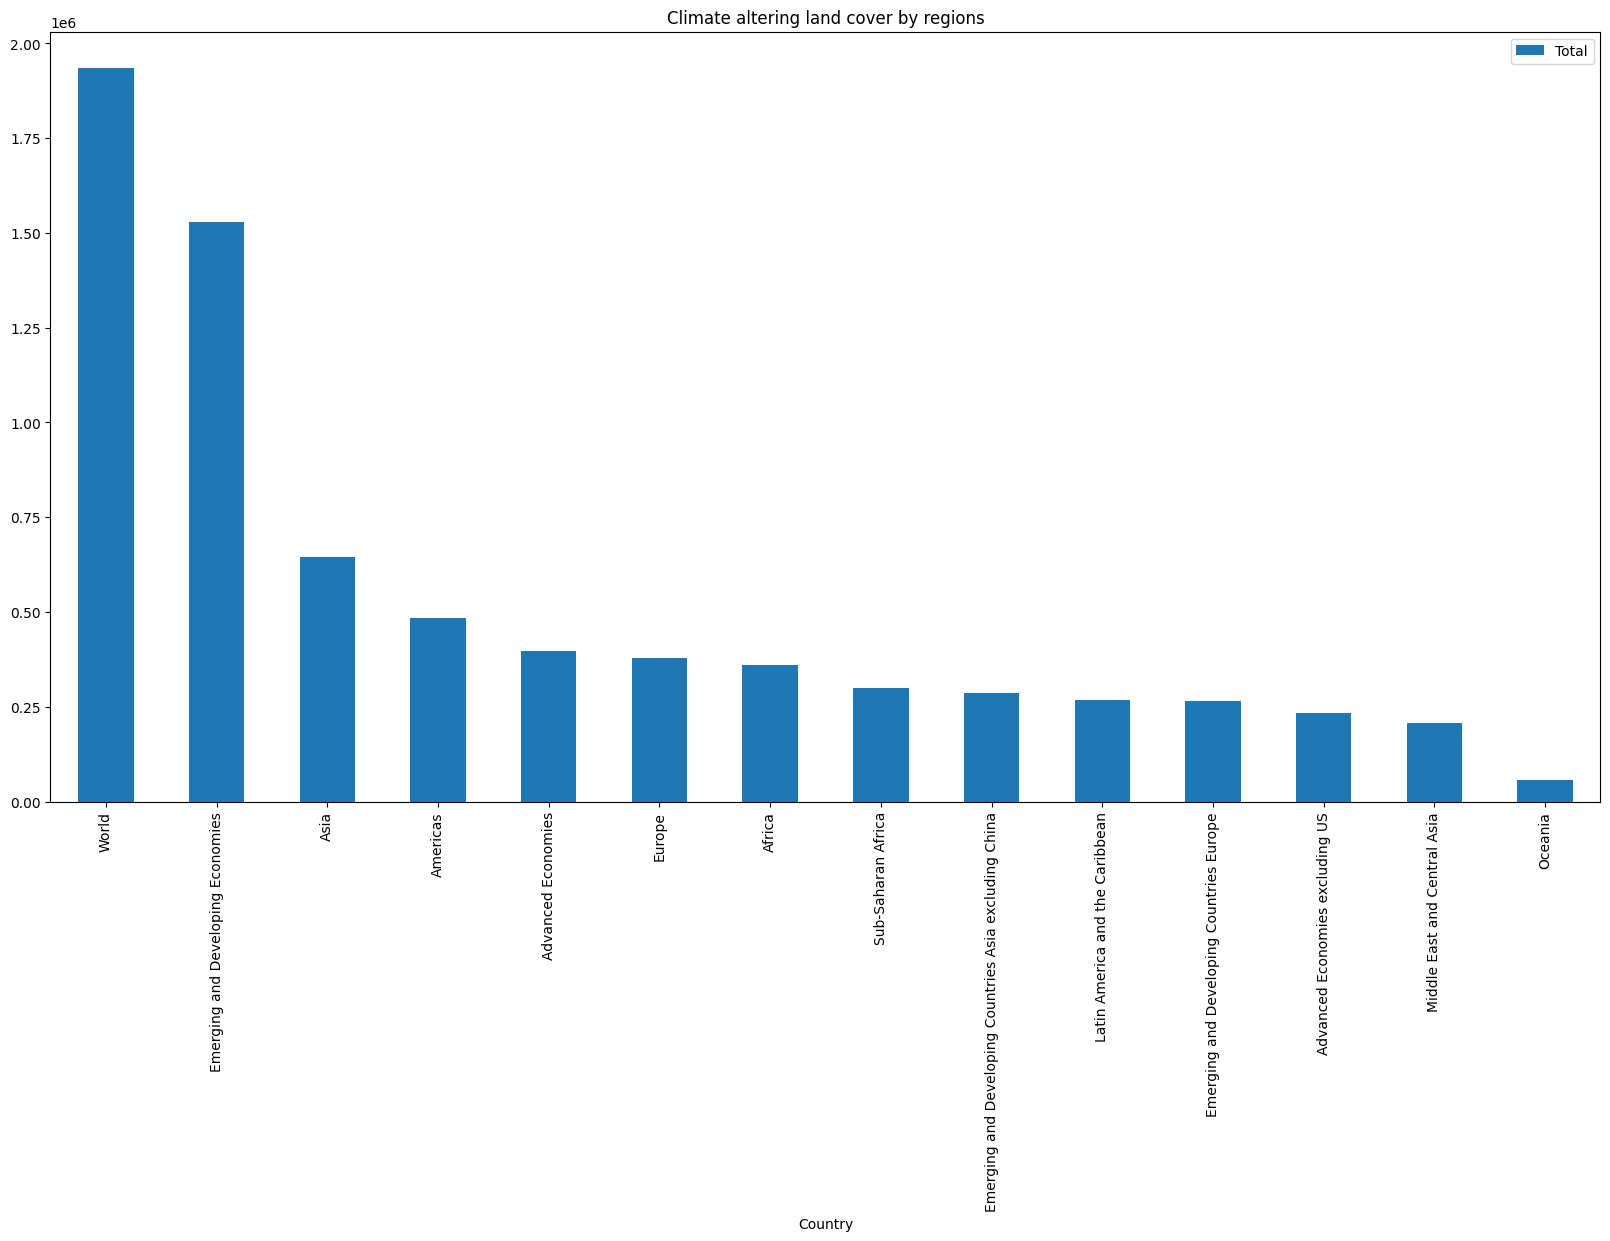

In [ ]:
region_df.plot(x='Country',y='Total',kind='bar',figsize=(20,10))
plt.title('Climate altering land cover by regions')
plt.show()

# Climate regulating regions


In [ ]:
climate_regulating = df.loc[df['Climate Influence'] == 'Climate regulating'].loc[df['Country'].isin(region)].groupby('Country').sum()
climate_regulating

,Indicator,Climate Influence,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country,,,,,,,,,,,,,,,,,,,,,
Advanced Economies,Total Land Cover,Climate regulating,2.257032e+06,2.264010e+06,2.264022e+06,2.262981e+06,2.262289e+06,2.262182e+06,2.261321e+06,2.259878e+06,...,2.257632e+06,2.257502e+06,2.257803e+06,2.258343e+06,2.258096e+06,2.258614e+06,2.259182e+06,2.265043e+06,2.266142e+06,2.267969e+06
Advanced Economies excluding US,Total Land Cover,Climate regulating,1.518743e+06,1.525725e+06,1.525825e+06,1.525224e+06,1.524842e+06,1.524918e+06,1.524503e+06,1.523541e+06,...,1.524006e+06,1.524005e+06,1.524510e+06,1.525223e+06,1.525083e+06,1.525693e+06,1.526458e+06,1.532968e+06,1.534596e+06,1.536441e+06
Africa,Total Land Cover,Climate regulating,1.419417e+06,1.510417e+06,1.510612e+06,1.507924e+06,1.507208e+06,1.506241e+06,1.505095e+06,1.501871e+06,...,1.498887e+06,1.608662e+06,1.608744e+06,1.609518e+06,1.609429e+06,1.610046e+06,1.610225e+06,1.610758e+06,1.610617e+06,1.610379e+06
Americas,Total Land Cover,Climate regulating,3.192875e+06,3.192408e+06,3.192818e+06,3.187039e+06,3.185378e+06,3.184289e+06,3.182074e+06,3.178506e+06,...,3.166819e+06,3.165406e+06,3.163554e+06,3.162674e+06,3.161407e+06,3.160150e+06,3.157785e+06,3.157015e+06,3.156545e+06,3.156743e+06
Asia,Total Land Cover,Climate regulating,1.411020e+06,1.413582e+06,1.416369e+06,1.415689e+06,1.415444e+06,1.414602e+06,1.413895e+06,1.412992e+06,...,1.431758e+06,1.433321e+06,1.434124e+06,1.434561e+06,1.434650e+06,1.436465e+06,1.436590e+06,1.436465e+06,1.438087e+06,1.438542e+06
Emerging and Developing Countries Asia excluding China,Total Land Cover,Climate regulating,5.873491e+05,5.884862e+05,5.903271e+05,5.900276e+05,5.902872e+05,5.895777e+05,5.893284e+05,5.894323e+05,...,5.976397e+05,5.979851e+05,5.983820e+05,5.983741e+05,5.984266e+05,5.989926e+05,5.992431e+05,5.997059e+05,6.010301e+05,6.013548e+05
Emerging and Developing Countries Europe,Total Land Cover,Climate regulating,1.456107e+06,1.456090e+06,1.456251e+06,1.456521e+06,1.456357e+06,1.456099e+06,1.455913e+06,1.455972e+06,...,1.466141e+06,1.465890e+06,1.465909e+06,1.466179e+06,1.466036e+06,1.466719e+06,1.466919e+06,1.466134e+06,1.465465e+06,1.465559e+06
Emerging and Developing Economies,Total Land Cover,Climate regulating,5.971246e+06,6.064306e+06,6.067935e+06,6.059241e+06,6.056584e+06,6.053450e+06,6.049536e+06,6.042270e+06,...,6.057919e+06,6.167906e+06,6.167219e+06,6.168259e+06,6.167190e+06,6.169200e+06,6.167513e+06,6.167195e+06,6.168101e+06,6.168480e+06
Europe,Total Land Cover,Climate regulating,1.723132e+06,1.730077e+06,1.730328e+06,1.730352e+06,1.730046e+06,1.729888e+06,1.729795e+06,1.729511e+06,...,1.740925e+06,1.740715e+06,1.740793e+06,1.741363e+06,1.741367e+06,1.742128e+06,1.742389e+06,1.741707e+06,1.740978e+06,1.741026e+06


In [ ]:
top_countries = set(df[df['Country'].isin(region)]['Country'])
top_countries_area = dict()
for year in range(1992,2021):
    for country in top_countries:
        top_countries_area[country] = list(climate_regulating.loc[climate_regulating.index == country]['2020'])[0]

In [ ]:
top_countries_area = {k: v for k,v in sorted(top_countries_area.items(), key=lambda x: x[1], reverse=True)}

In [ ]:
for i in top_countries_area.items():
    print(i)

('World', 8653735.065200001)
('Emerging and Developing Economies', 6168479.5562)
('Americas', 3156743.3094)
('Advanced Economies', 2267969.0852)
('Europe', 1741026.2565)
('Latin America and the Caribbean', 1641241.4034000002)
('Africa', 1610379.3419)
('Advanced Economies excluding US', 1536441.1881)
('Sub-Saharan Africa', 1480460.7579)
('Emerging and Developing Countries Europe', 1465558.7485999998)
('Asia', 1438542.4115)
('Emerging and Developing Countries Asia excluding China', 601354.8334)
('Oceania', 489226.5625)
('Middle East and Central Asia', 434341.7111)
('Namibia', 62782.80209999999)


In [ ]:
top_countries.remove('Namibia')

In [ ]:
top_countries_area.pop('Namibia')

62782.80209999999

In [ ]:
climate_regulating_indicator = ['Total Land Cover']

In [ ]:
total = []
for i in top_countries_area.items():
        total.append(list(df.loc[df['Country']==i[0]].loc[df['Climate Influence']=='Climate regulating'].loc[df['Indicator']==climate_regulating_indicator[0]]['2020'])[0])

In [ ]:
region_data = np.concatenate((np.reshape(list(top_countries_area.keys()),(-1,1)),np.reshape(total,(-1,1))),axis=1)
region_df = pd.DataFrame(region_data,columns=['Country','Total'])


In [ ]:
region_df['Total'] = region_df['Total'].astype(float)

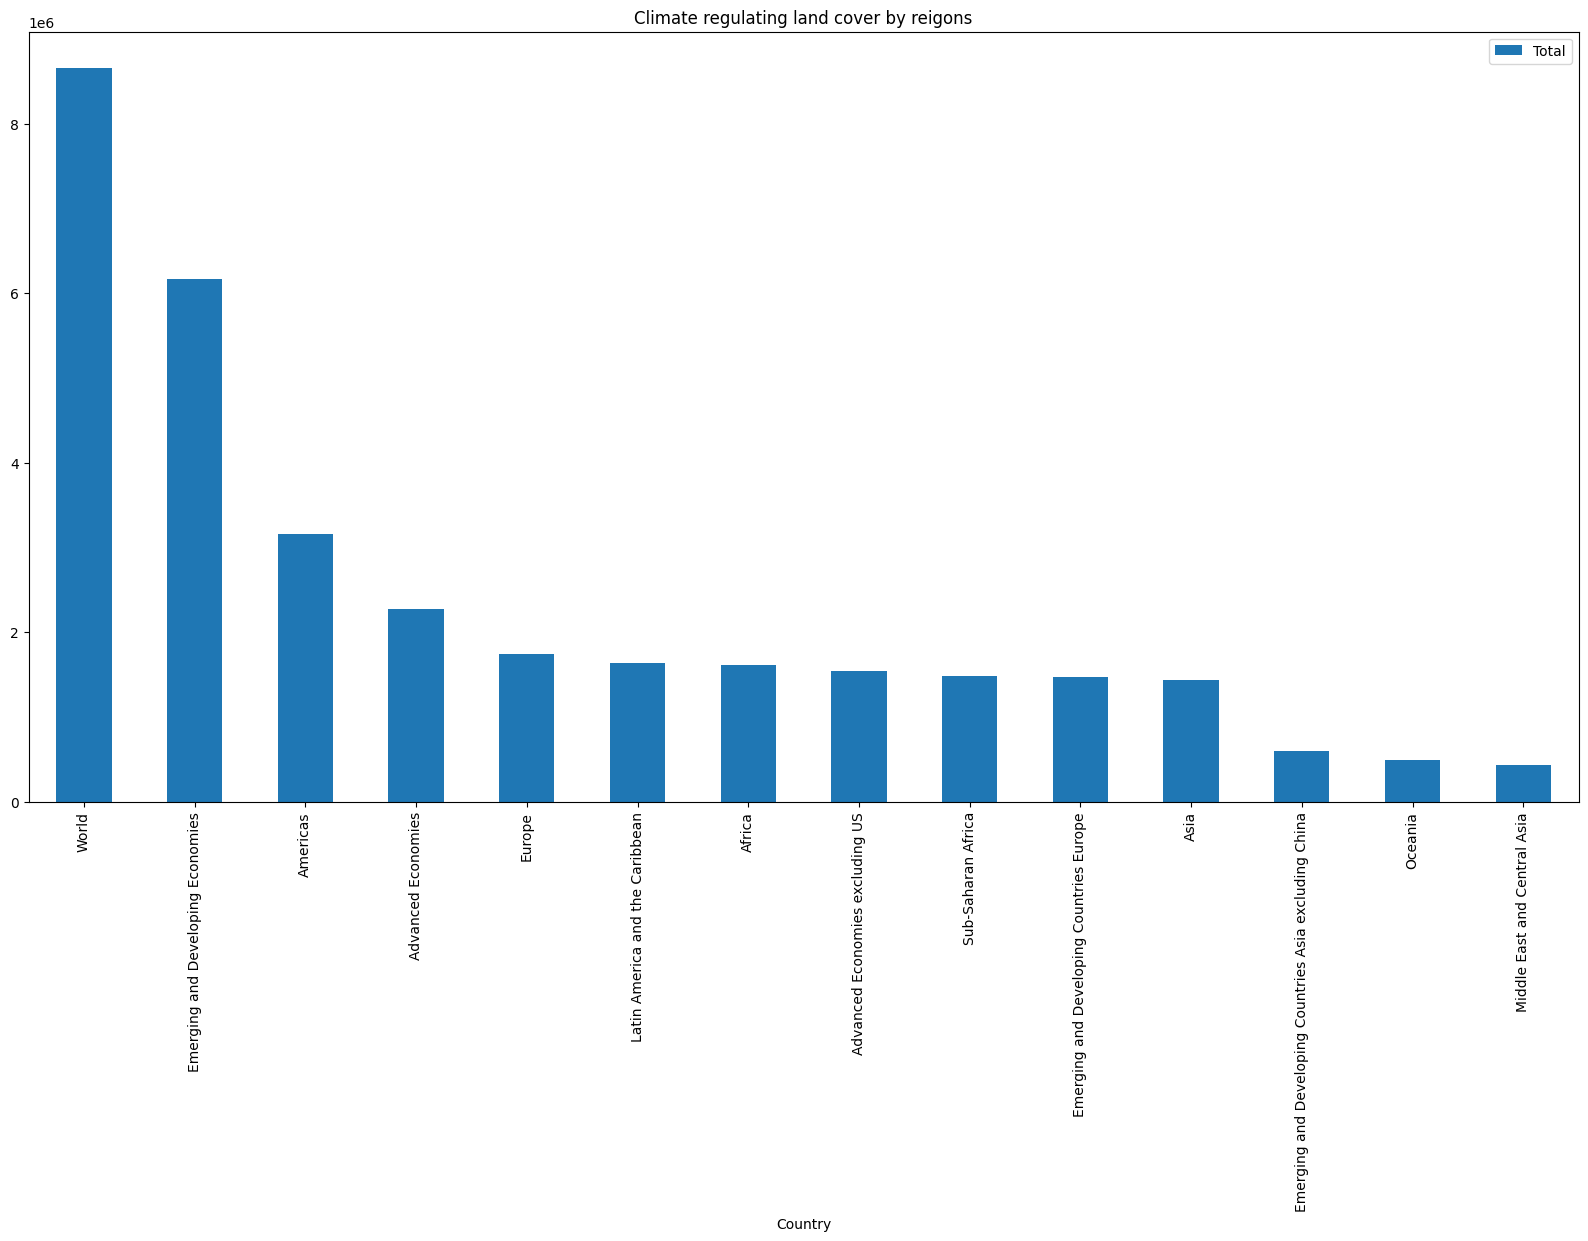

In [ ]:
region_df.plot(x='Country',y='Total',kind='bar',figsize=(20,10))
plt.title('Climate regulating land cover by reigons')
plt.show()

# Climate neutral regions

In [ ]:
climate_neutral = df.loc[df['Climate Influence'] == 'Climate neutral'].loc[df['Country'].isin(region)].groupby('Country').sum()
climate_neutral

,Indicator,Climate Influence,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country,,,,,,,,,,,,,,,,,,,,,
Advanced Economies,Total Land Cover,Climate neutral,5.271696e+05,5.271557e+05,5.271315e+05,5.269506e+05,5.271592e+05,5.269970e+05,5.272197e+05,5.268707e+05,...,5.250814e+05,5.249746e+05,5.246115e+05,5.240026e+05,5.242358e+05,5.236766e+05,5.228433e+05,5.163815e+05,5.147816e+05,5.128268e+05
Advanced Economies excluding US,Total Land Cover,Climate neutral,4.903120e+05,4.903000e+05,4.902774e+05,4.901252e+05,4.903151e+05,4.901299e+05,4.903111e+05,4.898790e+05,...,4.874116e+05,4.872913e+05,4.868651e+05,4.862404e+05,4.864563e+05,4.858956e+05,4.850613e+05,4.785808e+05,4.768940e+05,4.749546e+05
Africa,Total Land Cover,Climate neutral,8.905736e+05,9.048297e+05,9.048229e+05,9.049698e+05,9.048026e+05,9.045019e+05,9.043688e+05,9.041272e+05,...,8.989871e+05,1.003457e+06,1.003339e+06,1.002977e+06,1.002967e+06,1.002930e+06,1.002885e+06,1.002633e+06,1.002653e+06,1.002519e+06
Americas,Total Land Cover,Climate neutral,3.080225e+05,3.080131e+05,3.080039e+05,3.074241e+05,3.073088e+05,3.071002e+05,3.068952e+05,3.063182e+05,...,3.047506e+05,3.049075e+05,3.050290e+05,3.052522e+05,3.054831e+05,3.056337e+05,3.054804e+05,3.055371e+05,3.055490e+05,3.053223e+05
Asia,Total Land Cover,Climate neutral,9.809829e+05,9.809762e+05,9.810674e+05,9.815208e+05,9.817122e+05,9.811069e+05,9.803881e+05,9.773991e+05,...,9.620858e+05,9.614469e+05,9.611269e+05,9.600877e+05,9.600564e+05,9.600308e+05,9.598687e+05,9.592275e+05,9.585034e+05,9.579105e+05
Emerging and Developing Countries Asia excluding China,Total Land Cover,Climate neutral,1.088517e+05,1.088502e+05,1.088489e+05,1.089101e+05,1.089103e+05,1.088963e+05,1.088545e+05,1.088273e+05,...,1.080394e+05,1.078883e+05,1.078448e+05,1.078037e+05,1.078010e+05,1.080226e+05,1.079639e+05,1.073897e+05,1.069177e+05,1.066527e+05
Emerging and Developing Countries Europe,Total Land Cover,Climate neutral,1.553650e+05,1.553604e+05,1.553559e+05,1.546126e+05,1.546827e+05,1.545281e+05,1.544249e+05,1.538824e+05,...,1.483675e+05,1.484330e+05,1.484459e+05,1.482134e+05,1.483486e+05,1.481080e+05,1.479896e+05,1.481519e+05,1.483275e+05,1.485097e+05
Emerging and Developing Economies,Total Land Cover,Climate neutral,2.147866e+06,2.162108e+06,2.162185e+06,2.162080e+06,2.162226e+06,2.161160e+06,2.160202e+06,2.156340e+06,...,2.130253e+06,2.234166e+06,2.233756e+06,2.232094e+06,2.232185e+06,2.231969e+06,2.231586e+06,2.230804e+06,2.230206e+06,2.229606e+06
Europe,Total Land Cover,Climate neutral,1.774346e+05,1.774239e+05,1.774012e+05,1.766027e+05,1.766787e+05,1.765074e+05,1.763837e+05,1.758056e+05,...,1.694415e+05,1.694658e+05,1.694515e+05,1.691517e+05,1.692868e+05,1.690162e+05,1.688712e+05,1.690623e+05,1.692801e+05,1.694537e+05


In [ ]:
top_countries = set(df[df['Country'].isin(region)]['Country'])
top_countries_area = dict()
for year in range(1992,2021):
    for country in top_countries:
        top_countries_area[country] = list(climate_neutral.loc[climate_neutral.index == country]['2020'])[0]

In [ ]:
top_countries_area = {k: v for k,v in sorted(top_countries_area.items(), key=lambda x: x[1], reverse=True)}

In [ ]:
for i in top_countries_area.items():
    print(i)

('World', 2797060.9218)
('Emerging and Developing Economies', 2229605.7777)
('Middle East and Central Asia', 1374562.2673)
('Africa', 1002519.2833)
('Asia', 957910.457)
('Advanced Economies', 512826.819)
('Advanced Economies excluding US', 474954.5849)
('Oceania', 307238.609)
('Americas', 305322.3119)
('Sub-Saharan Africa', 288777.976)
('Europe', 169453.65430000002)
('Emerging and Developing Countries Europe', 148509.7048)
('Latin America and the Caribbean', 121722.7244)
('Emerging and Developing Countries Asia excluding China', 106652.6846)
('Namibia', 17567.6679)


In [ ]:
top_countries.remove('Namibia')

In [ ]:
top_countries_area.pop('Namibia')

17567.6679

In [ ]:
climate_neutral_indicator = ['Total Land Cover']

In [ ]:
total = []
for i in top_countries_area.items():
        total.append(list(df.loc[df['Country']==i[0]].loc[df['Climate Influence']=='Climate neutral'].loc[df['Indicator']==climate_neutral_indicator[0]]['2020'])[0])

In [ ]:
region_data = np.concatenate((np.reshape(list(top_countries_area.keys()),(-1,1)),np.reshape(total,(-1,1))),axis=1)
region_df = pd.DataFrame(region_data,columns=['Country','Total'])


In [ ]:
region_df['Total'] = region_df['Total'].astype(float)

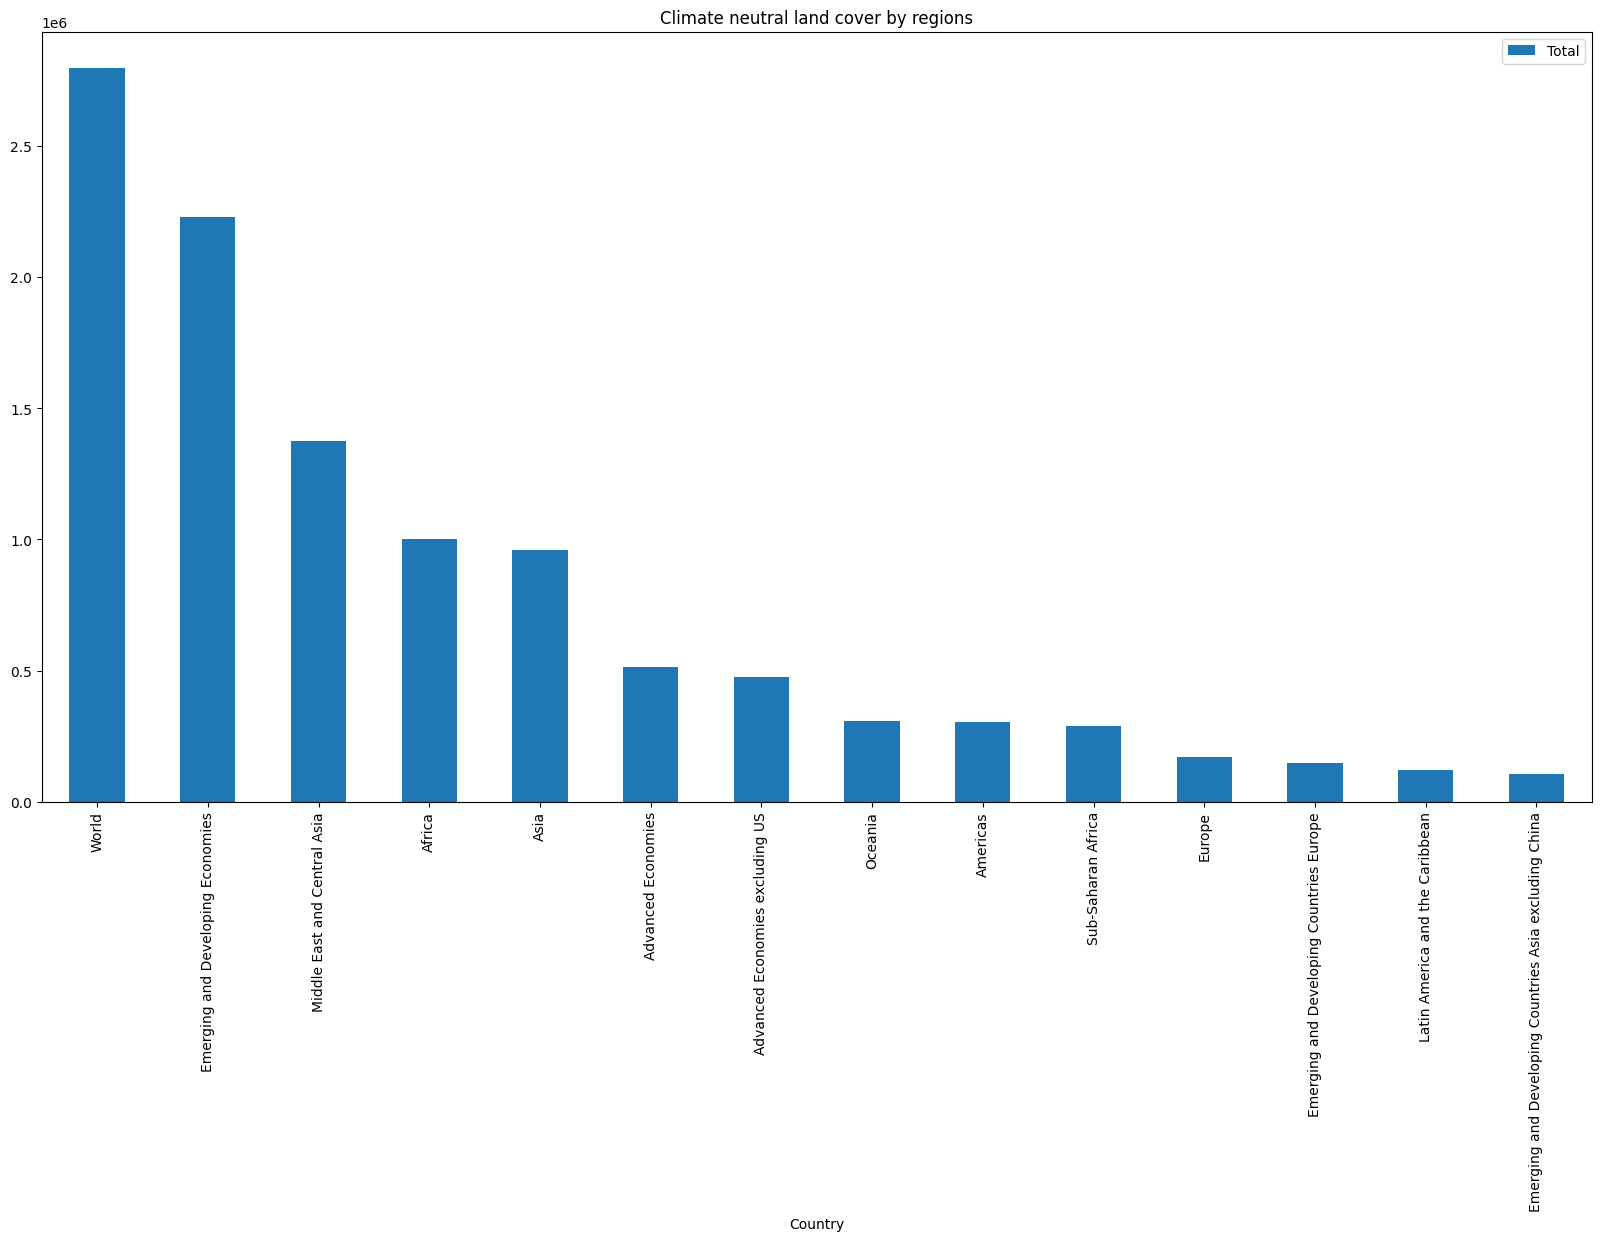

In [ ]:
region_df.plot(x='Country',y='Total',kind='bar',figsize=(20,10))
plt.title('Climate neutral land cover by regions')
plt.show()

# Viet Nam

In [ ]:
climate_altering = df.loc[df['Climate Influence']=='Climate altering'].loc[df['Indicator']!='Climate Altering Land Cover Index'].loc[df['Country']=='Vietnam'].sum()
climate_regulating = df.loc[df['Climate Influence']=='Climate regulating'].loc[df['Indicator']!='Climate Altering Land Cover Index'].loc[df['Country']=='Vietnam'].sum()
climate_neutral = df.loc[df['Climate Influence']=='Climate neutral'].loc[df['Indicator']!='Climate Altering Land Cover Index'].loc[df['Country']=='Vietnam'].sum()

In [ ]:
altering = []
regulating = []
neutral = []
for i in range(1992,2021):
    altering.append(climate_altering[str(i)])
    regulating.append(climate_regulating[str(i)])
    neutral.append(climate_neutral[str(i)])

Text(0.5, 1.0, 'Climate neutral')

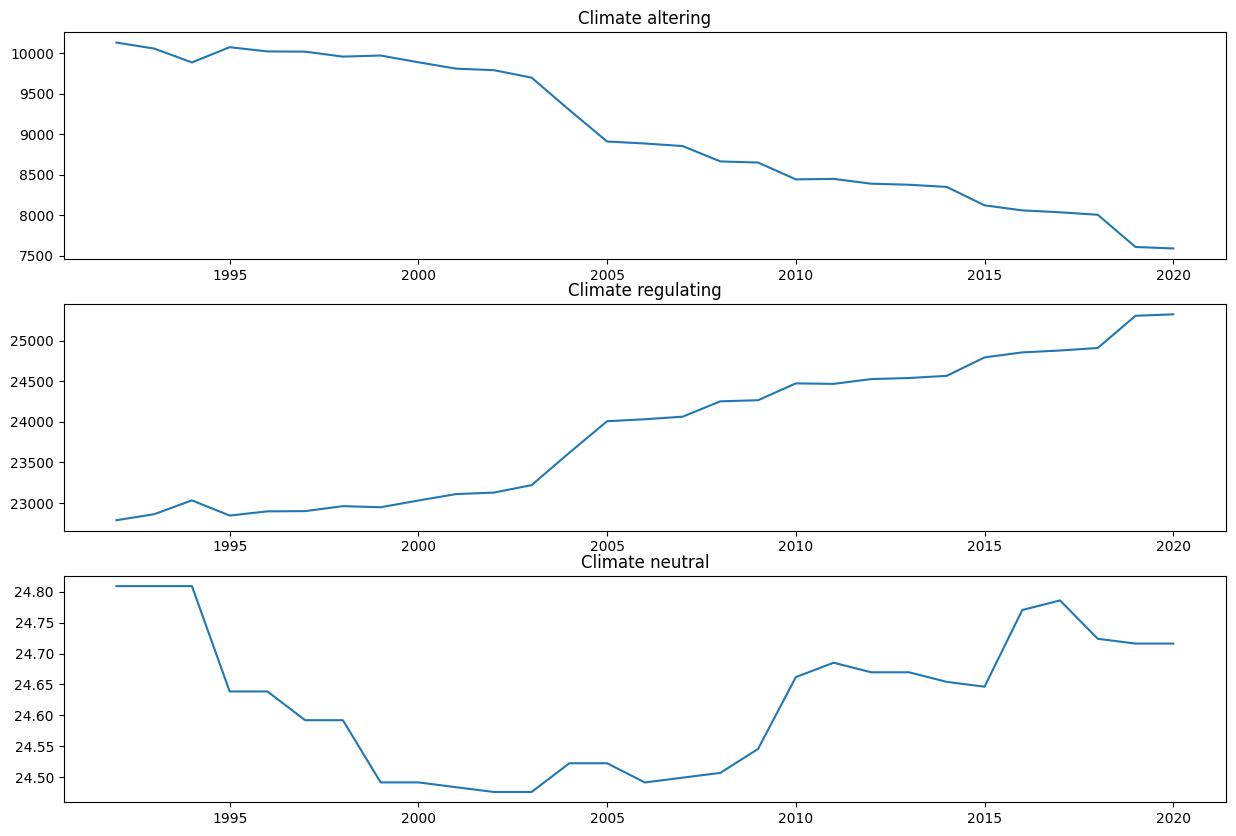

In [ ]:
fig,ax = plt.subplots(3,1,figsize=(15,10))
ax.flat[0].plot(range(1992,2021), altering)
ax.flat[0].set_title('Climate altering')
ax.flat[1].plot(range(1992,2021), regulating)
ax.flat[1].set_title('Climate regulating')
ax.flat[2].plot(range(1992,2021), neutral)
ax.flat[2].set_title('Climate neutral')


In [ ]:
altering_indicator = ['Artificial surfaces (including urban and associated areas)','Herbaceous crops']

In [ ]:
art_surefaces = []
herbaceous_crops = []
for i in range(1992,2021):
    art_surefaces.append(list(df.loc[df['Country']=='Vietnam'].loc[df['Indicator']==altering_indicator[0]][str(i)])[0])
    herbaceous_crops.append(list(df.loc[df['Country']=='Vietnam'].loc[df['Indicator']==altering_indicator[1]][str(i)])[0])

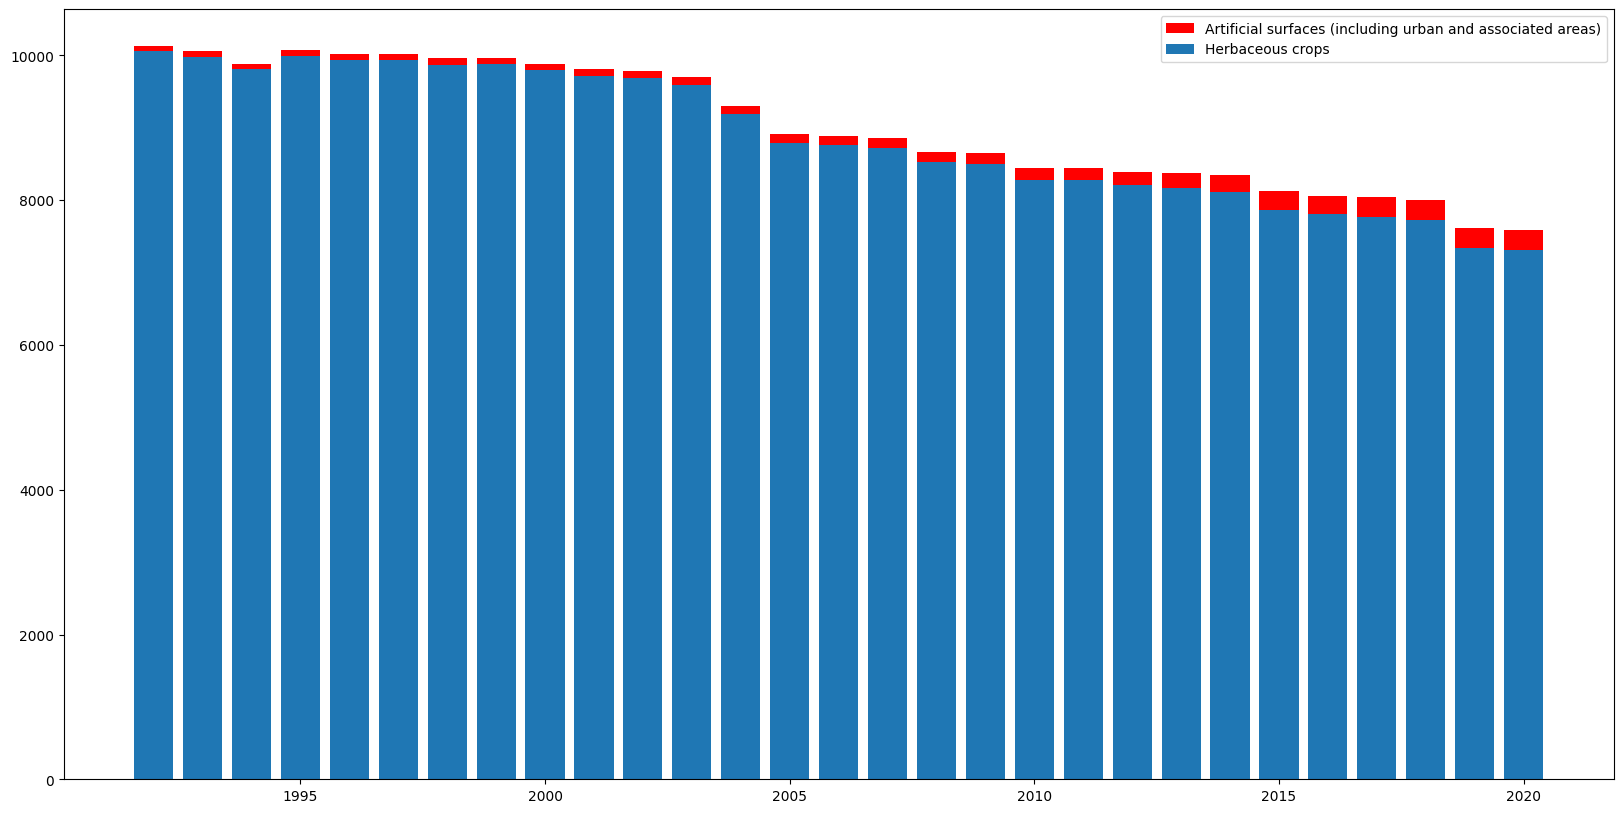

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(range(1992,2021),art_surefaces,bottom=herbaceous_crops,color='r')
plt.bar(range(1992,2021),herbaceous_crops)
plt.legend([altering_indicator[0],altering_indicator[1]])
plt.show()


In [ ]:
regulating_indicator = ['Grassland', 'Inland water bodies', 'Mangroves',
       'Permanent snow and glaciers', 'Shrub-covered areas',
       'Shrubs and/or herbaceous vegetation, aquatic or regularly flooded',
       'Tree-covered areas', 'Woody crops']

In [ ]:
grassland = []
inland_water_bodies = []
mangroves = []
permanent_snow_glaciers = []
shurb_covered_areas = []
shrub_herbaceous = []
tree_covered = []
woody_crops = []
for i in range(1992,2021):
    grassland.append(list(df[df['Country']=='Vietnam'].loc[df['Indicator']==regulating_indicator[0]][str(i)])[0])
    inland_water_bodies.append(list(df[df['Country']=='Vietnam'].loc[df['Indicator']==regulating_indicator[1]][str(i)])[0])
    mangroves.append(list(df[df['Country']=='Vietnam'].loc[df['Indicator']==regulating_indicator[2]][str(i)])[0])
    permanent_snow_glaciers.append(list(df[df['Country']=='Vietnam'].loc[df['Indicator']==regulating_indicator[3]][str(i)])[0])
    shurb_covered_areas.append(list(df[df['Country']=='Vietnam'].loc[df['Indicator']==regulating_indicator[4]][str(i)])[0])
    shrub_herbaceous.append(list(df[df['Country']=='Vietnam'].loc[df['Indicator']==regulating_indicator[5]][str(i)])[0])
    tree_covered.append(list(df[df['Country']=='Vietnam'].loc[df['Indicator']==regulating_indicator[6]][str(i)])[0])
    woody_crops.append(list(df[df['Country']=='Vietnam'].loc[df['Indicator']==regulating_indicator[7]][str(i)])[0])

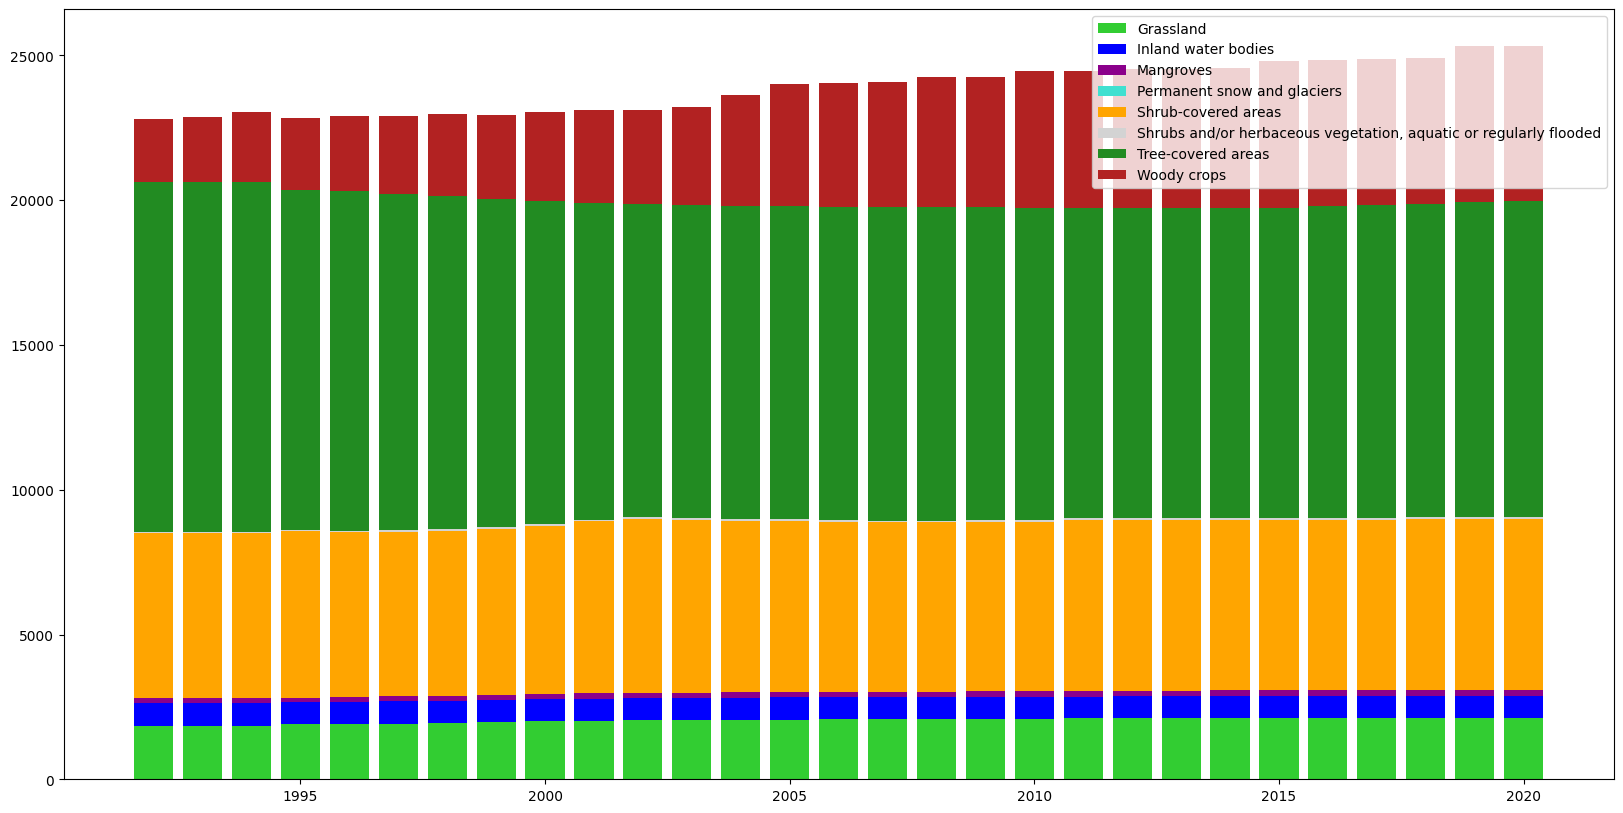

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(range(1992,2021),grassland,color = 'limegreen')
plt.bar(range(1992,2021),inland_water_bodies,bottom=grassland,color = 'b')
plt.bar(range(1992,2021),mangroves,bottom=np.array(grassland)+np.array(inland_water_bodies),color = 'darkmagenta')
plt.bar(range(1992,2021),permanent_snow_glaciers,bottom=np.array(grassland)+np.array(inland_water_bodies)+np.array(mangroves),color='turquoise')
plt.bar(range(1992,2021),shurb_covered_areas,bottom=np.array(grassland)+np.array(inland_water_bodies)+np.array(mangroves)+np.array(permanent_snow_glaciers),color ='orange')
plt.bar(range(1992,2021),shrub_herbaceous,bottom=np.array(grassland)+np.array(inland_water_bodies)+np.array(mangroves)+np.array(permanent_snow_glaciers)+np.array(shurb_covered_areas),color = 'lightgrey')
plt.bar(range(1992,2021),tree_covered,bottom=np.array(grassland)+np.array(inland_water_bodies)+np.array(mangroves)+np.array(permanent_snow_glaciers)+np.array(shurb_covered_areas)+np.array(shrub_herbaceous),color='forestgreen')
plt.bar(range(1992,2021),woody_crops,bottom=np.array(grassland)+np.array(inland_water_bodies)+np.array(mangroves)+np.array(permanent_snow_glaciers)+np.array(shurb_covered_areas)+np.array(shrub_herbaceous)+np.array(tree_covered),color='firebrick')
plt.legend(regulating_indicator)
plt.show()

In [ ]:
neutral_indicator = ['Sparsely natural vegetated areas', 'Terrestrial barren land']

In [ ]:
sparse_vegetated = []
terrestrial_barren = []
for i in range(1992,2021):
    sparse_vegetated.append(list(df[df['Country']=='Vietnam'].loc[df['Indicator']==neutral_indicator[0]][str(i)])[0])
    terrestrial_barren.append(list(df[df['Country']=='Vietnam'].loc[df['Indicator']==neutral_indicator[1]][str(i)])[0])

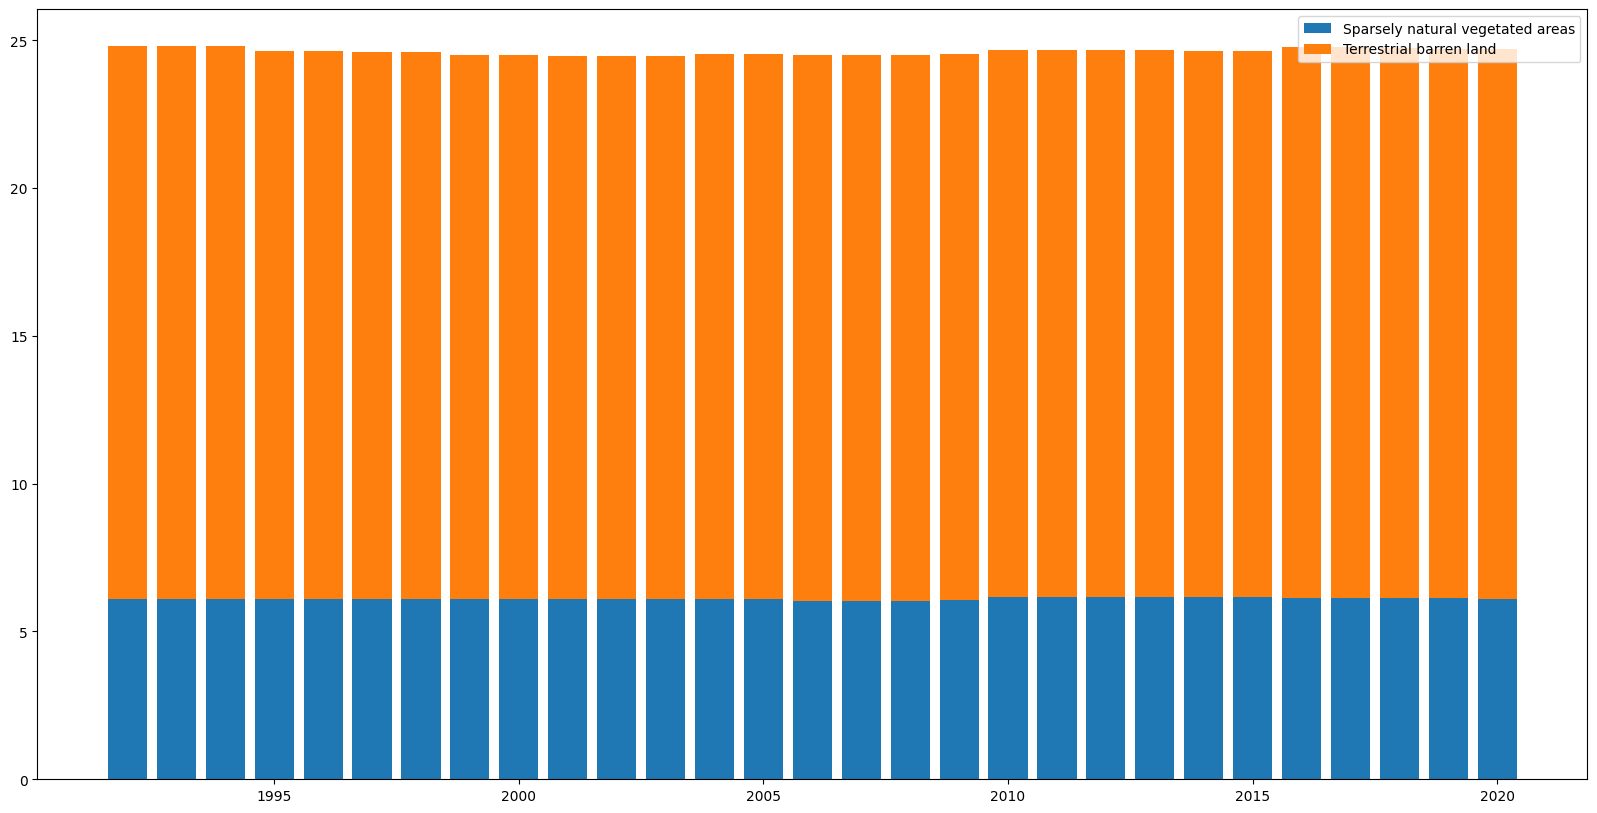

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(range(1992,2021),sparse_vegetated)
plt.bar(range(1992,2021),terrestrial_barren,bottom=sparse_vegetated)
plt.legend(neutral_indicator)
plt.show()